In [1]:
!pip install scikit-multilearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 6.5 MB/s eta 0:00:00


In [2]:
!pip install fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296186 sha256=d55cc13b06bcc1c6bdd2cd231b8d7aaa99ccae76a74cd24737362090a9200943
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [3]:
!pip install scikit-multilearn


In [4]:
import pandas as pd
import numpy as np
import ast
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, hamming_loss, f1_score, multilabel_confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
import fasttext
from transformers import BertTokenizer
import gensim
import gensim.downloader

In [5]:
import pandas as pd
import numpy as np
from skmultilearn.problem_transform import LabelPowerset
from sklearn.preprocessing import MultiLabelBinarizer
import gensim
from sklearn.svm import LinearSVC
import pickle

#glove_vectors = gensim.models.KeyedVectors.load_word2vec_format('glove.6B.100d.txt',binary=False, no_header=True)

dataset = pd.read_excel("Synthetic User Stories.xlsx")

labels = pd.read_excel("Keyword labelled.xlsx", header=None)
labels[2] = labels[2].apply(lambda x: x.lower())
labels

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,classification,NaN,abstractive summarization,Data summarization,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,regression,NaN,action model learning,Other,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ranking,NaN,activation function,Representation learning,Classification,Regression,Anomaly detection,Clustering,Spatio-temporal process learning,Graph diffusion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,matching,NaN,active learning setting,Classification,Regression,Anomaly detection,Entity resolution,Sentiment analysis,Bias detection in word embeddings,Bias detection in language models,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,risk assessment,NaN,adaboost,Classification,Regression,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,NaN,NaN,word segmentation,Machine translation,Speech recognition,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,word similarity,Classification,Ranking,Matching,Clustering,Anomaly detection,Sentiment analysis,Entity resolution,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,NaN,NaN,word-sense disambiguation,Classification,Ranking,Matching,Clustering,Anomaly detection,Sentiment analysis,Entity resolution,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,NaN,NaN,word2vec,Classification,Ranking,Matching,Clustering,Anomaly detection,Sentiment analysis,Entity resolution,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
categories_column = []
for row in labels.iterrows():
    current_labels = []
    for label in row[1][3:]:
        if isinstance(label, str):
            current_labels.append(label.lower())
    categories_column.append(current_labels)
labels["Categories array"] = categories_column
target = []
counter = 0
for row in dataset.iterrows():
    target.append(labels[labels[2]==row[1]["Machine Learning Task"].lower()]["Categories array"].values[0])
    counter += 1
dataset["Target"] = target
dataset[["User Story","Target"]]

,User Story,Target
0,A group of researchers is using abstractive su...,[data summarization]
1,"As a plant scientist, I want to use abstractiv...",[data summarization]
2,"As a molecular biologist, I want to use action...",[other]
3,"As a plant scientist, I want to use action mod...",[other]
4,"As a bioinformatics researcher, I want to use ...","[representation learning, classification, regr..."
...,...,...
12396,"As a computer vision researcher, I want to use...","[classification, ranking, matching, clustering..."
12397,"As a network engineer, I want to use word2vec ...","[classification, ranking, matching, clustering..."
12398,"As a computer vision researcher, I want to use...","[classification, ranking, matching, clustering..."
12399,"As a network engineer, I want to use WordNet t...","[representation learning, clustering, matching..."


In [7]:
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(dataset['Target'])
pd.DataFrame(y, columns=multilabel.classes_)

,advertising,anomaly detection,bias detection in language models,bias detection in word embeddings,classification,clustering,data summarization,districting,entity resolution,graph augmentation,...,ranking,regression,representation learning,resource allocation,risk assessment,sentiment analysis,spatio-temporal process learning,speech recognition,subset selection,task assignment
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12396,0,1,0,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
12397,0,1,0,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
12398,0,1,0,0,1,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
12399,0,1,1,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# Assuming 'Target' column contains multi-labels (e.g., ['label1', 'label2', ...])
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(dataset['Target'])

# The number of unique labels corresponds to output_dim
output_dim = len(multilabel.classes_)
print(f"Output dimension (number of labels): {output_dim}")

# Convert y into DataFrame to check the binary matrix
#y_df = pd.DataFrame(y, columns=multilabel.classes_)
#print(y_df)


Output dimension (number of labels): 26


In [ ]:
y_df = pd.DataFrame(y, columns=multilabel.classes_)
y_df.head()  # Print the first few rows to inspect the binary matrix


,advertising,anomaly detection,bias detection in language models,bias detection in word embeddings,classification,clustering,data summarization,districting,entity resolution,graph augmentation,...,ranking,regression,representation learning,resource allocation,risk assessment,sentiment analysis,spatio-temporal process learning,speech recognition,subset selection,task assignment
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0


In [8]:
from transformers import AlbertTokenizer
import pandas as pd

def getTrainSetALBERT():
    tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')  # Change to ALBERT
    tokenized_data = tokenizer(dataset['User Story'].tolist(), padding=True, truncation=True, max_length=100)

    traindata = []
    for msg in tokenized_data['input_ids']:
        traindata.append(msg)

    traindata = pd.DataFrame(traindata)
    traindata.columns = traindata.columns.astype(str)

    return traindata



In [9]:
# Assuming dataset is already defined
X = getTrainSetALBERT()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2,21,214,16,5885,25,568,8502,1284,18074,...,0,0,0,0,0,0,0,0,0,0
1,2,28,21,1321,6415,15,31,259,20,275,...,0,0,0,0,0,0,0,0,0,0
2,2,28,21,8062,20215,15,31,259,20,275,...,0,0,0,0,0,0,0,0,0,0
3,2,28,21,1321,6415,15,31,259,20,275,...,0,0,0,0,0,0,0,0,0,0
4,2,28,21,3136,108,23588,8354,11102,15,31,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12396,2,28,21,1428,2750,11102,15,31,259,20,...,0,0,0,0,0,0,0,0,0,0
12397,2,28,21,982,2335,15,31,259,20,275,...,0,0,0,0,0,0,0,0,0,0
12398,2,28,21,1428,2750,11102,15,31,259,20,...,0,0,0,0,0,0,0,0,0,0
12399,2,28,21,982,2335,15,31,259,20,275,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
indexes = ['F1-mean', 'Precision-mean', 'Recall-mean', 'Hammer-Loss-mean',
           'F1-fold1','Precision-fold1','Recall-fold1','Hammer-Loss-fold1',
           'F1-fold2','Precision-fold2','Recall-fold2','Hammer-Loss-fold2',
           'F1-fold3','Precision-fold3','Recall-fold3','Hammer-Loss-fold3',
           'F1-fold4','Precision-fold4','Recall-fold4','Hammer-Loss-fold4',
           'F1-fold5','Precision-fold5','Recall-fold5','Hammer-Loss-fold5',
           'F1-fold6','Precision-fold6','Recall-fold6','Hammer-Loss-fold6',
           'F1-fold7','Precision-fold7','Recall-fold7','Hammer-Loss-fold7',
           'F1-fold8','Precision-fold8','Recall-fold8','Hammer-Loss-fold8',
           'F1-fold9','Precision-fold9','Recall-fold9','Hammer-Loss-fold9',
           'F1-fold10','Precision-fold10','Recall-fold10','Hammer-Loss-fold10',
]

column = ['BinaryRelevance LogisticRegression','BinaryRelevance RandomForestClassifier','BinaryRelevance GaussianNB','BinaryRelevance LinearSVC','BinaryRelevance KNeighborsClassifier','BinaryRelevance DecisionTreeClassifier',
          'ClassifierChain LogisticRegression','ClassifierChain RandomForestClassifier','ClassifierChain GaussianNB','ClassifierChain LinearSVC','ClassifierChain KNeighborsClassifier','ClassifierChain DecisionTreeClassifier',
          'LabelPowerset LogisticRegression','LabelPowerset RandomForestClassifier','LabelPowerset GaussianNB','LabelPowerset LinearSVC','LabelPowerset KNeighborsClassifier','LabelPowerset DecisionTreeClassifier'
        ]
results = pd.DataFrame(index=indexes, columns=column)
results.head()

,BinaryRelevance LogisticRegression,BinaryRelevance RandomForestClassifier,BinaryRelevance GaussianNB,BinaryRelevance LinearSVC,BinaryRelevance KNeighborsClassifier,BinaryRelevance DecisionTreeClassifier,ClassifierChain LogisticRegression,ClassifierChain RandomForestClassifier,ClassifierChain GaussianNB,ClassifierChain LinearSVC,ClassifierChain KNeighborsClassifier,ClassifierChain DecisionTreeClassifier,LabelPowerset LogisticRegression,LabelPowerset RandomForestClassifier,LabelPowerset GaussianNB,LabelPowerset LinearSVC,LabelPowerset KNeighborsClassifier,LabelPowerset DecisionTreeClassifier
F1-mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Precision-mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recall-mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hammer-Loss-mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F1-fold1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_pred1 = pd.DataFrame(columns=['Real Label',
                                  'BinaryRelevance LogisticRegression','BinaryRelevance RandomForestClassifier','BinaryRelevance GaussianNB','BinaryRelevance LinearSVC','BinaryRelevance KNeighborsClassifier','BinaryRelevance DecisionTreeClassifier',
                                  'ClassifierChain LogisticRegression','ClassifierChain RandomForestClassifier','ClassifierChain GaussianNB','ClassifierChain LinearSVC','ClassifierChain KNeighborsClassifier','ClassifierChain DecisionTreeClassifier',
                                  'LabelPowerset LogisticRegression','LabelPowerset RandomForestClassifier','LabelPowerset GaussianNB','LabelPowerset LinearSVC','LabelPowerset KNeighborsClassifier','LabelPowerset DecisionTreeClassifier'])

for i in range(0, len(y)):
  df_pred1.loc[i, 'Real Label'] = list(y[i])


df_pred2 = df_pred1.copy(deep=True)
df_pred3 = df_pred1.copy(deep=True)
df_pred4 = df_pred1.copy(deep=True)
df_pred5 = df_pred1.copy(deep=True)
df_pred6 = df_pred1.copy(deep=True)
df_pred7 = df_pred1.copy(deep=True)
df_pred8 = df_pred1.copy(deep=True)
df_pred9 = df_pred1.copy(deep=True)
df_pred10 = df_pred1.copy(deep=True)
df_pred1.head()

,Real Label,BinaryRelevance LogisticRegression,BinaryRelevance RandomForestClassifier,BinaryRelevance GaussianNB,BinaryRelevance LinearSVC,BinaryRelevance KNeighborsClassifier,BinaryRelevance DecisionTreeClassifier,ClassifierChain LogisticRegression,ClassifierChain RandomForestClassifier,ClassifierChain GaussianNB,ClassifierChain LinearSVC,ClassifierChain KNeighborsClassifier,ClassifierChain DecisionTreeClassifier,LabelPowerset LogisticRegression,LabelPowerset RandomForestClassifier,LabelPowerset GaussianNB,LabelPowerset LinearSVC,LabelPowerset KNeighborsClassifier,LabelPowerset DecisionTreeClassifier
0,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def build_model(model, mlb_estimator, X, y):

  clf=mlb_estimator(model)
  kf = KFold(n_splits=10, shuffle=True)

  prec_scores = np.zeros(10)
  rec_scores = np.zeros(10)
  f_scores = np.zeros(10)
  ham_scores = np.zeros(10)
  conf_matrix = []
  pred = pd.DataFrame(columns=['0','1','2','3','4','5','6','7','8','9'])
  idx = 0
  name = str(type(clf).__name__) + " " + str(type(model).__name__)
  for index, (train_index, test_index) in enumerate(kf.split(X, y)):
      print("Training on fold " + str(index+1) + "/10...")
      # Generate batches from indices
      X_train, X_test, y_train, y_test = \
            X[ X.index.isin(train_index)], X[ X.index.isin(test_index)], y[train_index], y[test_index]

      clf.fit(X_train.values, y_train)
      clf_pred = clf.predict(X_test.values)

      for j in range (0, len(clf_pred.toarray())):
        pred.loc[j, str(idx)] = list(clf_pred.toarray()[j])

      conf_matrix.append(multilabel_confusion_matrix(y_test, clf_pred))
      prec_scores[idx] = precision_score(y_test, clf_pred, average='micro')
      rec_scores[idx] = recall_score(y_test, clf_pred, average='micro')
      f_scores[idx] = f1_score(y_test, clf_pred, average='micro')
      ham_scores[idx] = hamming_loss(y_test, clf_pred)
      idx+=1

  results.loc['F1-mean'][name] = np.mean(f_scores)
  results.loc['Precision-mean'][name] = np.mean(prec_scores)
  results.loc['Recall-mean'][name] = np.mean(rec_scores)
  results.loc['Hammer-Loss-mean'][name] = np.mean(ham_scores)

  for i in range (0,10):
      f1 = "F1-fold"
      prec = "Precision-fold"
      rec = "Recall-fold"
      ham = "Hammer-Loss-fold"
      results.loc[f1+str(i+1)][name] = f_scores[i]
      results.loc[prec+str(i+1)][name] = prec_scores[i]
      results.loc[rec+str(i+1)][name] = rec_scores[i]
      results.loc[ham+str(i+1)][name] = ham_scores[i]


  for i in range(0, len(pred)):
    df_pred1.loc[i, name] = pred.iloc[i]['0']
    df_pred2.loc[i, name] = pred.iloc[i]['1']
    df_pred3.loc[i, name] = pred.iloc[i]['2']
    df_pred4.loc[i, name] = pred.iloc[i]['3']
    df_pred5.loc[i, name] = pred.iloc[i]['4']
    df_pred6.loc[i, name] = pred.iloc[i]['5']
    df_pred7.loc[i, name] = pred.iloc[i]['6']
    df_pred8.loc[i, name] = pred.iloc[i]['7']
    df_pred9.loc[i, name] = pred.iloc[i]['8']
    df_pred10.loc[i, name] = pred.iloc[i]['9']

  return prec_scores, rec_scores, f_scores, ham_scores, conf_matrix

In [ ]:
def plot_confusion_matrix(cm):
  f, axes = plt.subplots(2, 4, figsize=(25, 15))
  axes = axes.ravel()
  for i in range(7):
    disp = ConfusionMatrixDisplay(cm[i])
    disp.plot(ax=axes[i], values_format='.4g',cmap='Blues')
    disp.ax_.set_title(list(multilabel.classes_)[i])
    disp.im_.colorbar.remove()

  f.delaxes(axes[7])
  plt.subplots_adjust(wspace=0.25, hspace=0.10)
  f.colorbar(disp.im_, ax=axes)
  plt.show()

# BiLSTM

In [10]:
pip install --upgrade sympy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 45.4 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu121 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


In [11]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_combined_confusion_matrix(y_true, y_pred, class_labels):
    y_true_np = y_true.numpy()
    y_pred_np = (y_pred.numpy() >= 0.5).astype(int)  # Apply threshold to predictions

    conf_matrices = multilabel_confusion_matrix(y_true_np, y_pred_np)

    num_classes = len(class_labels)
    rows = int(np.ceil(num_classes / 3))  # Adjust number of rows
    cols = min(3, num_classes)  # At most 3 columns

    fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
    axes = axes.flatten()

    for i, (matrix, label) in enumerate(zip(conf_matrices, class_labels)):
        ax = axes[i]
        cax = ax.matshow(matrix, cmap=plt.cm.Blues)
        fig.colorbar(cax, ax=ax)

        ax.set_title(label)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')

        # Set ticks and labels explicitly
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Negative', 'Positive'])
        ax.set_yticks([0, 1])
        ax.set_yticklabels(['Negative', 'Positive'])

        # Overlay matrix values
        for (x, y), value in np.ndenumerate(matrix):
            ax.text(y, x, f"{value:.1f}", ha='center', va='center', color="red")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage after model evaluation
# class_labels = ["Class 1", "Class 2", ...]  # Replace with actual class names
# plot_combined_confusion_matrix(targets.cpu(), preds.cpu(), class_labels)


In [12]:
import seaborn as sns

def plot_prediction_heatmap(y_true, y_pred, class_labels, threshold=0.5):
    y_pred_binary = (y_pred.numpy() >= threshold).astype(int)
    y_true_np = y_true.numpy()

    # Aggregate predictions and targets
    heatmap_data = np.zeros((len(class_labels), 2))  # 2 columns: True, Predicted
    for i in range(len(class_labels)):
        heatmap_data[i, 0] = np.sum(y_true_np[:, i])  # True label count
        heatmap_data[i, 1] = np.sum(y_pred_binary[:, i])  # Predicted label count

    # Create heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", xticklabels=["True", "Predicted"], yticklabels=class_labels, cmap="YlGnBu")
    plt.title("Heatmap of True and Predicted Label Counts")
    plt.xlabel("Category")
    plt.ylabel("Labels")
    plt.show()


In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, hamming_loss
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def train_bilstm(model, criterion, optimizer, train_loader, device):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.float())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate_bilstm(model, test_loader, device):
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            all_preds.append(outputs.cpu())
            all_targets.append(y_batch)
    return torch.cat(all_preds), torch.cat(all_targets)

def compute_metrics(y_true, y_pred, threshold=0.5):
    # Apply threshold for binary classification
    y_pred_binary = (y_pred >= threshold).int()

    # Convert to numpy arrays for sklearn metrics
    y_true_np = y_true.numpy()
    y_pred_np = y_pred_binary.numpy()

    precision = precision_score(y_true_np, y_pred_np, average='micro')
    recall = recall_score(y_true_np, y_pred_np, average='micro')
    f1 = f1_score(y_true_np, y_pred_np, average='micro')
    hamming = hamming_loss(y_true_np, y_pred_np)

    return precision, recall, f1, hamming

def build_model_with_bilstm(model, X, y, num_epochs=10):
    kf = KFold(n_splits=10, shuffle=True)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = model.to(device)
    criterion = nn.BCELoss()  # For multi-label binary classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Metrics storage
    precision_scores, recall_scores, f1_scores, hamming_scores = [], [], [], []
    final_preds, final_targets = None, None  # To store predictions and targets for the final fold
    # Accessing the class labels directly from 'multilabel.classes_'
    class_labels = multilabel.classes_

    for index, (train_index, test_index) in enumerate(kf.split(X, y)):
        print(f"Fold {index+1}/{kf.get_n_splits()}...")

        # Convert to tensor slices using indices directly
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Convert to DataLoader format
        train_loader = DataLoader(
            TensorDataset(X_train, y_train),
            batch_size=256, shuffle=True)
        test_loader = DataLoader(
            TensorDataset(X_test, y_test),
            batch_size=256)

        # Train over multiple epochs
        for epoch in range(num_epochs):
            train_loss = train_bilstm(model, criterion, optimizer, train_loader, device)

            # Evaluate on test data
            preds, targets = evaluate_bilstm(model, test_loader, device)
            precision, recall, f1, hamming = compute_metrics(targets, preds)

            print(f"Epoch {epoch + 1}/{num_epochs} - "
                  f"Train Loss: {train_loss:.4f} - "
                  f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, Hamming Loss: {hamming:.4f}")

        # Store metrics for the current fold
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        hamming_scores.append(hamming)

        # Save predictions and targets for the final fold
        final_preds, final_targets = preds, targets

    # After all folds are completed, plot the confusion matrix for the final fold
    print("\nPlotting confusion matrix for the final fold...")
    #class_labels = [f"Label {i}" for i in range(y.size(1))]  # Replace with actual class names

    plot_prediction_heatmap(final_targets.cpu(), final_preds.cpu(), class_labels)

    # Aggregate and print final results
    print("=" * 50)
    print(f"Final Results Across Folds:")
    print(f"Precision: {np.mean(precision_scores):.4f}")
    print(f"Recall: {np.mean(recall_scores):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f}")
    print(f"Hamming Loss: {np.mean(hamming_scores):.4f}")

    return {
        "precision": precision_scores,
        "recall": recall_scores,
        "f1": f1_scores,
        "hamming_loss": hamming_scores,
    }


Fold 1/10...
Epoch 1/50 - Train Loss: 0.5204 - Precision: 0.5410, Recall: 0.2485, F1: 0.3406, Hamming Loss: 0.2417
Epoch 2/50 - Train Loss: 0.4971 - Precision: 0.5332, Recall: 0.1962, F1: 0.2868, Hamming Loss: 0.2450
Epoch 3/50 - Train Loss: 0.4949 - Precision: 0.5581, Recall: 0.1955, F1: 0.2895, Hamming Loss: 0.2409
Epoch 4/50 - Train Loss: 0.4843 - Precision: 0.6213, Recall: 0.2215, F1: 0.3266, Hamming Loss: 0.2294
Epoch 5/50 - Train Loss: 0.4346 - Precision: 0.6891, Recall: 0.4769, F1: 0.5637, Hamming Loss: 0.1854
Epoch 6/50 - Train Loss: 0.3947 - Precision: 0.7522, Recall: 0.5037, F1: 0.6034, Hamming Loss: 0.1663
Epoch 7/50 - Train Loss: 0.3610 - Precision: 0.7900, Recall: 0.5305, F1: 0.6347, Hamming Loss: 0.1534
Epoch 8/50 - Train Loss: 0.3384 - Precision: 0.7785, Recall: 0.5911, F1: 0.6720, Hamming Loss: 0.1450
Epoch 9/50 - Train Loss: 0.3209 - Precision: 0.7762, Recall: 0.6455, F1: 0.7048, Hamming Loss: 0.1358
Epoch 10/50 - Train Loss: 0.3038 - Precision: 0.7772, Recall: 0.7042,

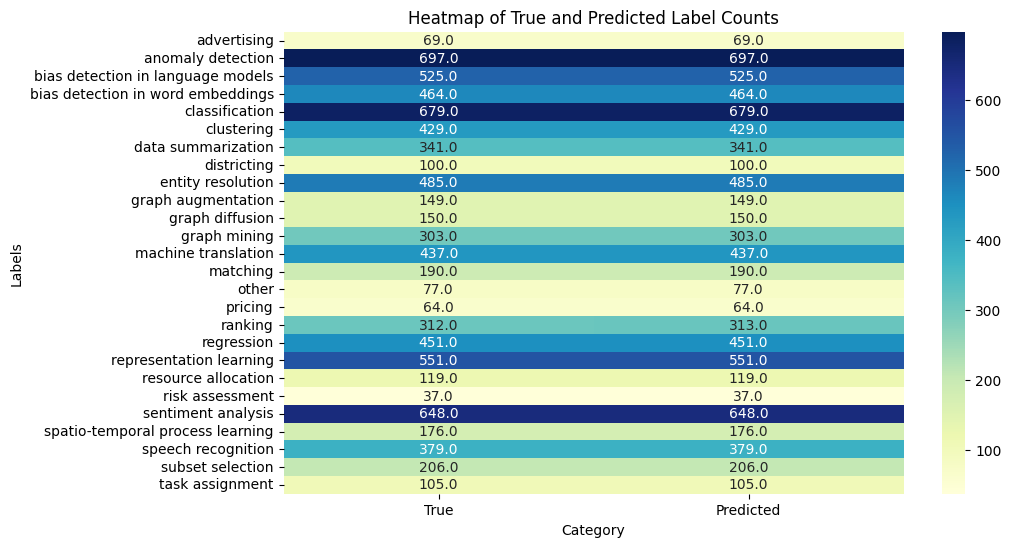

Final Results Across Folds:
Precision: 0.9991
Recall: 0.9987
F1 Score: 0.9989
Hamming Loss: 0.0005


In [14]:
import torch
import torch.nn as nn
from transformers import RobertaTokenizer

# Define the GRU model class
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, embedding_dim=128, dropout_rate=0.5):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer to reduce overfitting
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 because of bidirectional GRU
        self.sigmoid = nn.Sigmoid()  # For multi-label classification

    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, _ = self.gru(embedded)
        gru_out = self.dropout(gru_out)  # Apply dropout after GRU
        out = self.fc(gru_out[:, -1, :])  # Take the last hidden state
        return self.sigmoid(out)


# Initialize the tokenizer for ALBERT
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')


# Assuming you have already tokenized 'X' and binarized 'y'
X_tensor = torch.tensor(X.values, dtype=torch.long)  # Tokenized input
y_tensor = torch.tensor(y, dtype=torch.float)  # Multi-label target (binary)

# Initialize the model
input_dim = tokenizer.vocab_size  # Size of ALBERT's vocabulary
hidden_dim = 128  # Hidden layer size for LSTM
output_dim = y.shape[1]  # Number of output labels (26 in this case)
dropout_rate = 0.5  # Dropout rate

model = GRUModel(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, dropout_rate=dropout_rate)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization with weight_decay
loss_fn = nn.BCEWithLogitsLoss()


# Train and evaluate the model (simplified example)
num_epochs = 50
results = build_model_with_bilstm(model, X_tensor, y_tensor, num_epochs)



Fold 1/10...
Epoch 1/50 - Train Loss: 0.5200 - Precision: 0.5489, Recall: 0.1822, F1: 0.2736, Hamming Loss: 0.2438
Epoch 2/50 - Train Loss: 0.4970 - Precision: 0.5369, Recall: 0.2462, F1: 0.3376, Hamming Loss: 0.2434
Epoch 3/50 - Train Loss: 0.4943 - Precision: 0.5369, Recall: 0.2461, F1: 0.3375, Hamming Loss: 0.2434
Epoch 4/50 - Train Loss: 0.4929 - Precision: 0.5584, Recall: 0.1112, F1: 0.1855, Hamming Loss: 0.2461
Epoch 5/50 - Train Loss: 0.4794 - Precision: 0.6276, Recall: 0.3064, F1: 0.4118, Hamming Loss: 0.2206
Epoch 6/50 - Train Loss: 0.4320 - Precision: 0.7622, Recall: 0.4545, F1: 0.5694, Hamming Loss: 0.1732
Epoch 7/50 - Train Loss: 0.3763 - Precision: 0.7650, Recall: 0.5809, F1: 0.6604, Hamming Loss: 0.1506
Epoch 8/50 - Train Loss: 0.3400 - Precision: 0.7710, Recall: 0.6448, F1: 0.7023, Hamming Loss: 0.1378
Epoch 9/50 - Train Loss: 0.3073 - Precision: 0.8068, Recall: 0.6583, F1: 0.7250, Hamming Loss: 0.1258
Epoch 10/50 - Train Loss: 0.2804 - Precision: 0.8226, Recall: 0.6990,

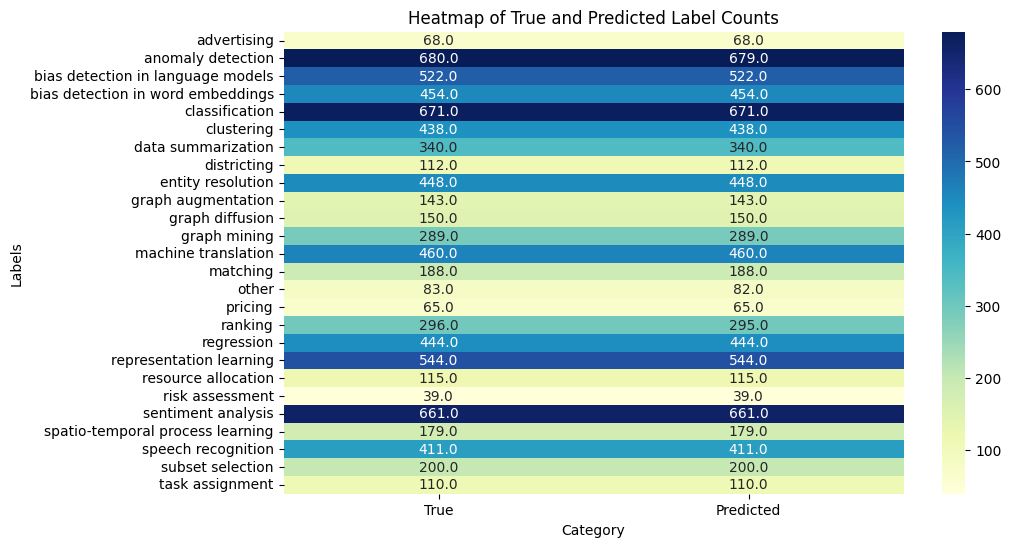

Final Results Across Folds:
Precision: 0.9987
Recall: 0.9980
F1 Score: 0.9983
Hamming Loss: 0.0008


In [15]:
# Define the BiGRU model class
class BiGRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, embedding_dim=128, dropout_rate=0.5):
        super(BiGRUModel, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.gru = nn.GRU(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer to reduce overfitting
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 because of bidirectional GRU
        self.sigmoid = nn.Sigmoid()  # For multi-label classification

    def forward(self, x):
        embedded = self.embedding(x)
        gru_out, _ = self.gru(embedded)
        gru_out = self.dropout(gru_out)  # Apply dropout after GRU
        out = self.fc(gru_out[:, -1, :])  # Take the last hidden state
        return self.sigmoid(out)

# Initialize the tokenizer for ALBERT
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')


# Assuming you have already tokenized 'X' and binarized 'y'
X_tensor = torch.tensor(X.values, dtype=torch.long)  # Tokenized input
y_tensor = torch.tensor(y, dtype=torch.float)  # Multi-label target (binary)

# Initialize the model
input_dim = tokenizer.vocab_size  # Size of ALBERT's vocabulary
hidden_dim = 128  # Hidden layer size for LSTM
output_dim = y.shape[1]  # Number of output labels (26 in this case)
dropout_rate = 0.5  # Dropout rate

model = BiGRUModel(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, dropout_rate=dropout_rate)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization with weight_decay
loss_fn = nn.BCEWithLogitsLoss()


# Train and evaluate the model (simplified example)
num_epochs = 50
results = build_model_with_bilstm(model, X_tensor, y_tensor, num_epochs)


In [ ]:
import torch
import torch.nn as nn
import pandas as pd
from transformers import AlbertTokenizer
from sklearn.preprocessing import MultiLabelBinarizer
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset




# Define the BiLSTM model class
class BiLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, embedding_dim=128, dropout_rate=0.5):
        super(BiLSTMModel, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer to reduce overfitting
        self.fc = nn.Linear(hidden_dim * 2, output_dim)  # *2 because of bidirectional LSTM
        self.sigmoid = nn.Sigmoid()  # For multi-label classification

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = self.dropout(lstm_out)  # Apply dropout after LSTM
        out = self.fc(lstm_out[:, -1, :])  # Take the last hidden state
        return self.sigmoid(out)

# Initialize the tokenizer for ALBERT
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

# Assuming you have already tokenized 'X' and binarized 'y'
X_tensor = torch.tensor(X.values, dtype=torch.long)  # Tokenized input
y_tensor = torch.tensor(y, dtype=torch.float)  # Multi-label target (binary)

# Initialize the model
input_dim = tokenizer.vocab_size  # Size of ALBERT's vocabulary
hidden_dim = 128  # Hidden layer size for LSTM
output_dim = y.shape[1]  # Number of output labels (26 in this case)
dropout_rate = 0.5  # Dropout rate

model = BiLSTMModel(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, dropout_rate=dropout_rate)

# Define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization with weight_decay
loss_fn = nn.BCEWithLogitsLoss()


# Train and evaluate the model (simplified example)
num_epochs = 1
results = build_model_with_bilstm(model, X_tensor, y_tensor, num_epochs)



Fold 1/10...
Epoch 1/1 - Train Loss: 0.5198 - Precision: 0.5205, Recall: 0.2432, F1: 0.3315, Hamming Loss: 0.2422
Fold 2/10...
Epoch 1/1 - Train Loss: 0.4947 - Precision: 0.5332, Recall: 0.2439, F1: 0.3347, Hamming Loss: 0.2446
Fold 3/10...


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(y_true, y_pred, class_labels):
    plt.figure(figsize=(12, 8))
    for i, label in enumerate(class_labels):
        precision, recall, _ = precision_recall_curve(y_true.numpy()[:, i], y_pred.numpy()[:, i])
        plt.plot(recall, precision, label=f"{label}")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()


# RandomForest

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-21-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-21-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Precision: 0.928304062538316
Recall Score: 0.6707994469472544
F1 Score: 0.7787843330488566
Hamming Loss: 0.09543315594363785


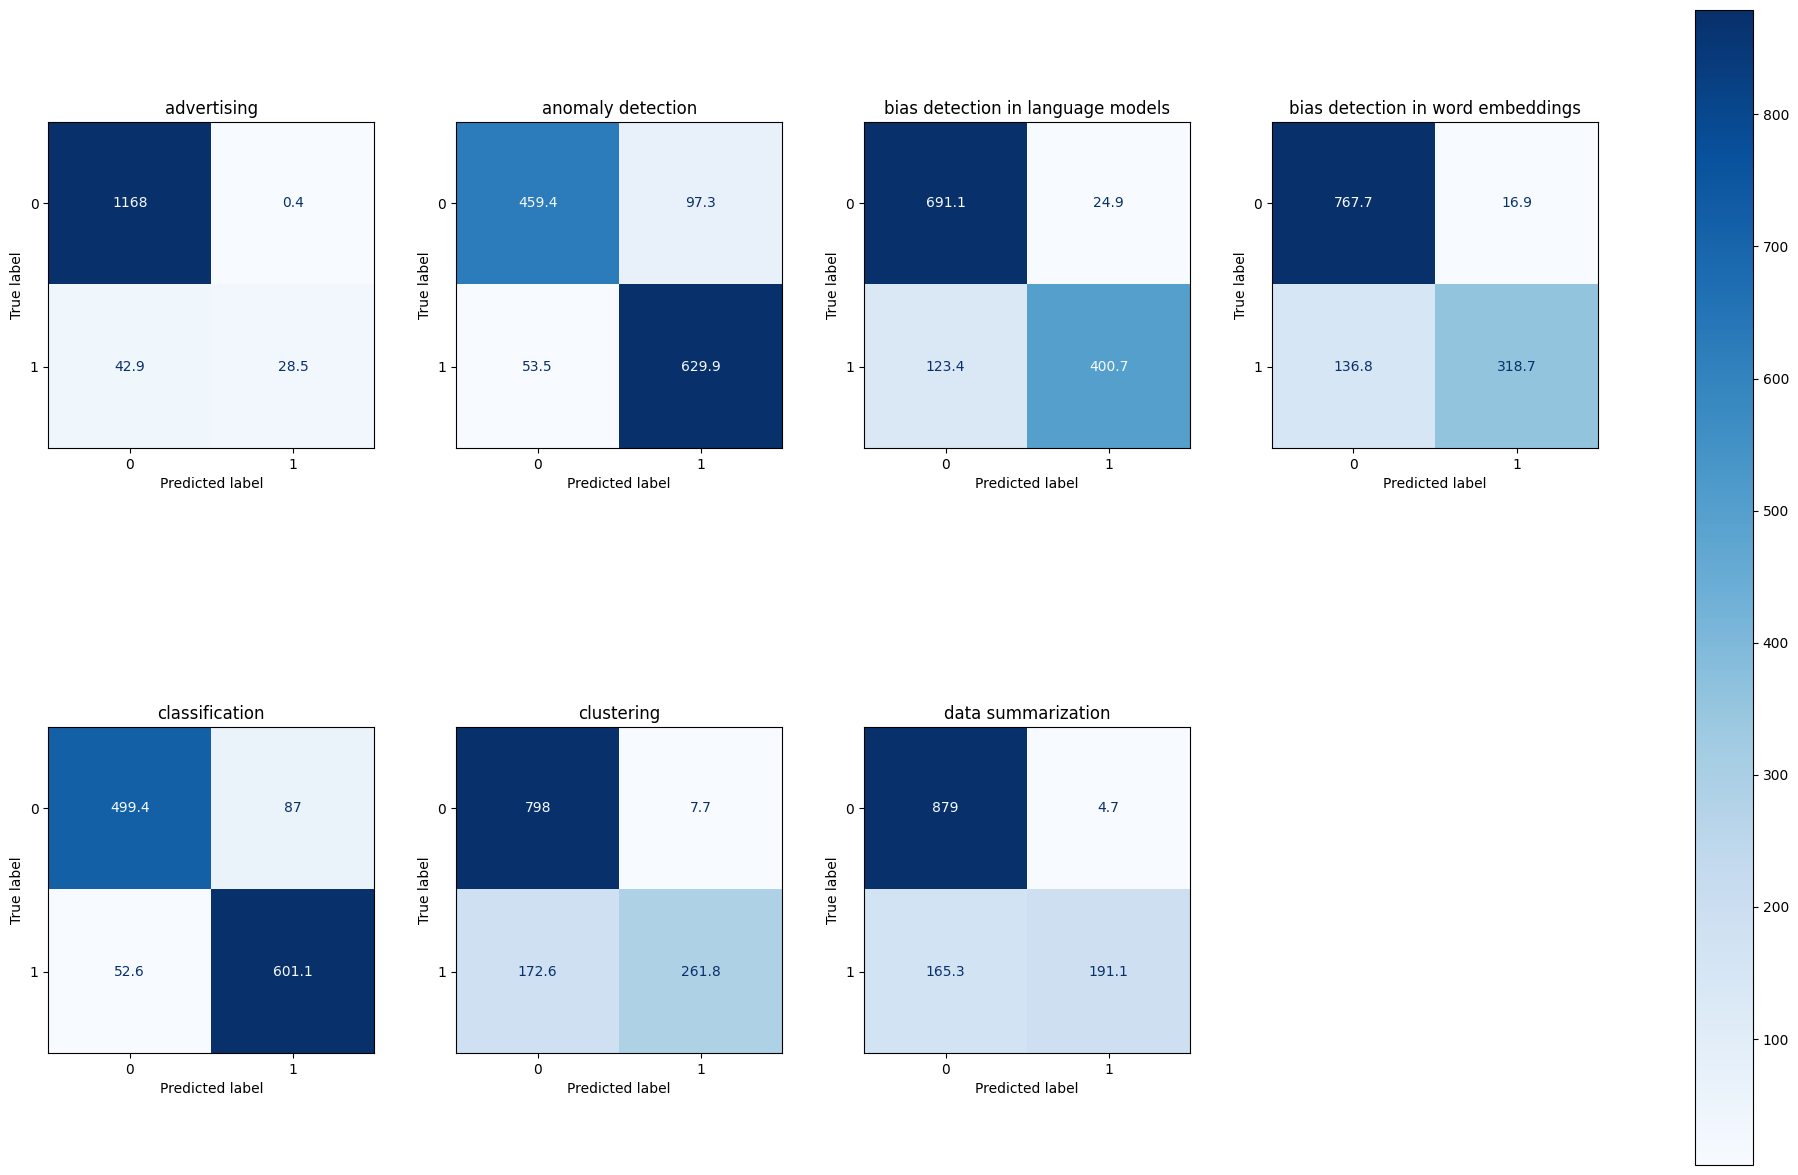

In [ ]:
model = RandomForestClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, BinaryRelevance, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 2/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 3/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 4/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 5/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 6/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 7/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 8/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 9/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 10/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Precision: 0.5505848089232295
Recall Score: 0.23594047272120394
F1 Score: 0.3302090617027294
Hamming Loss: 0.23964855145634173


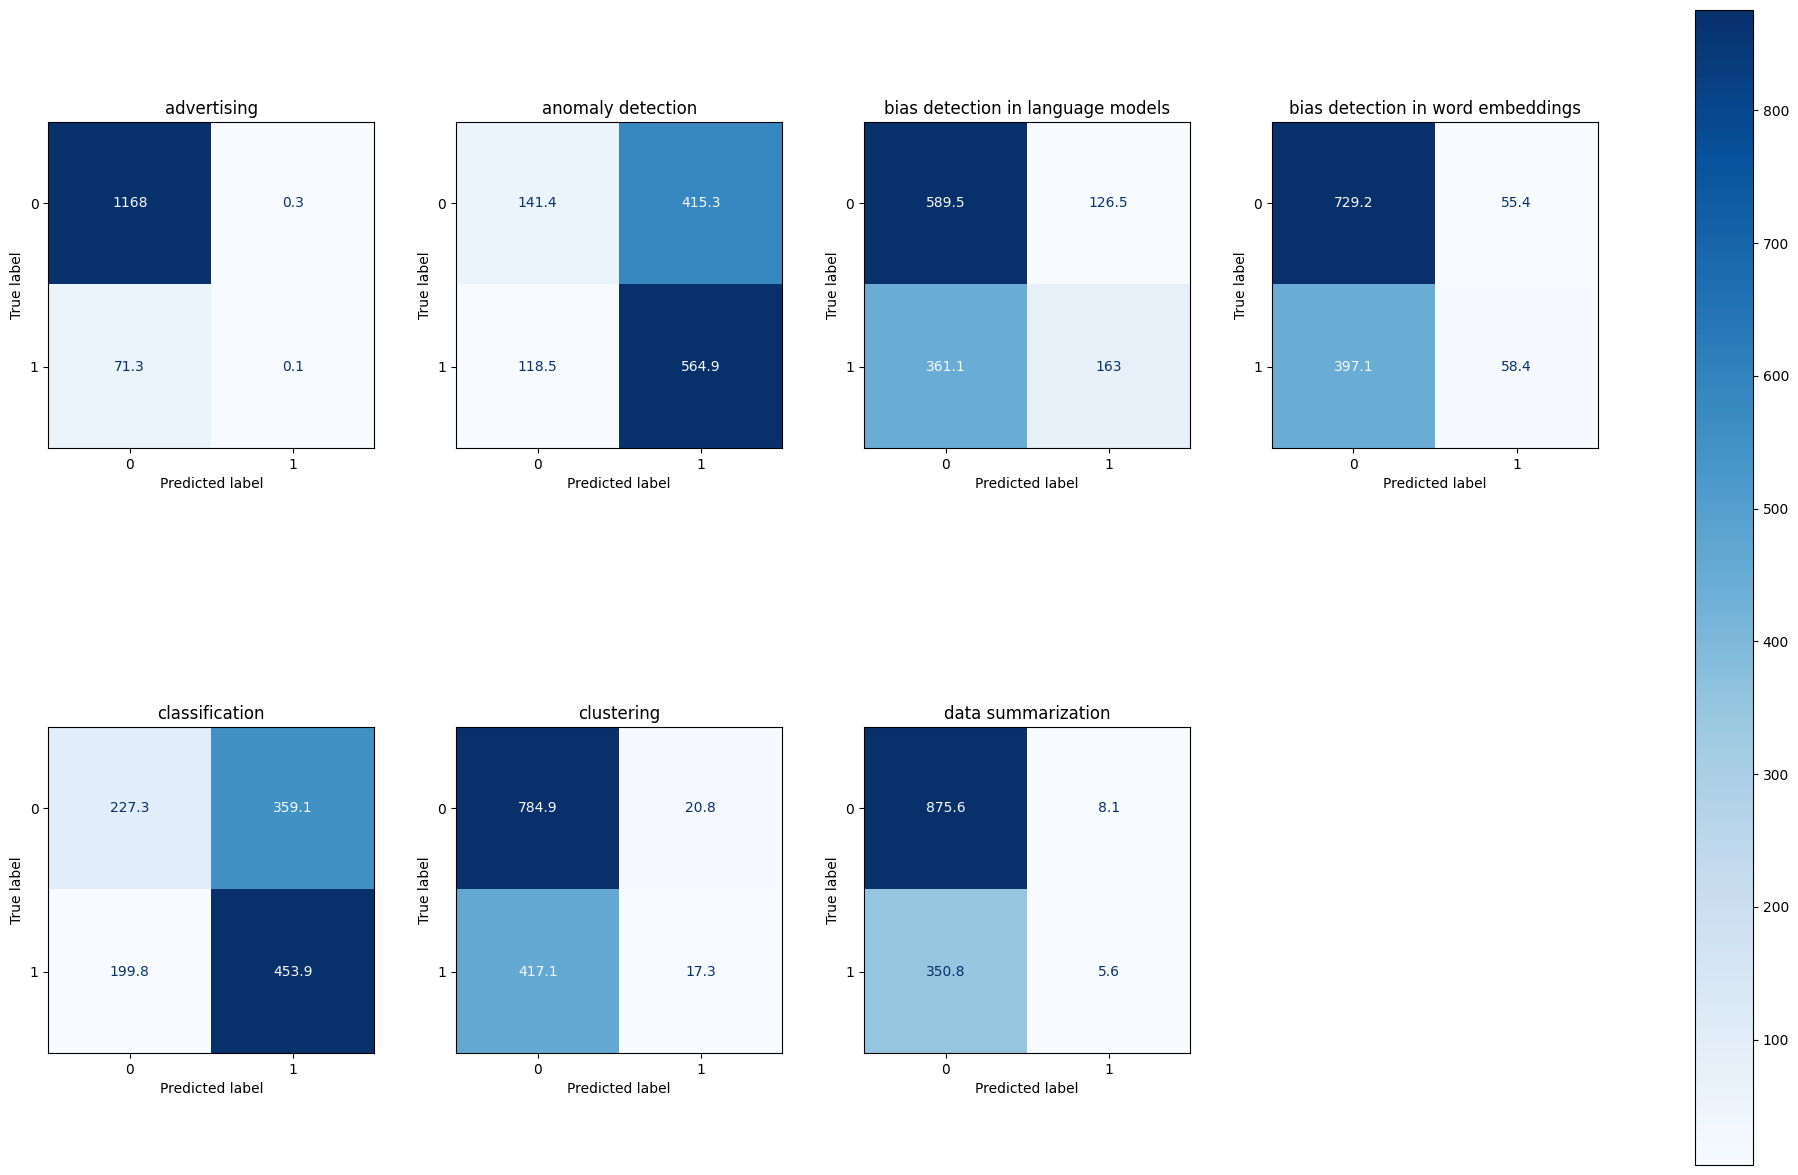

In [ ]:
model = LogisticRegression()

prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, BinaryRelevance, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-21-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-21-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Precision: 0.1448375261669359
Recall Score: 0.2608961483988138
F1 Score: 0.18624823510547078
Hamming Loss: 0.5710521086812644


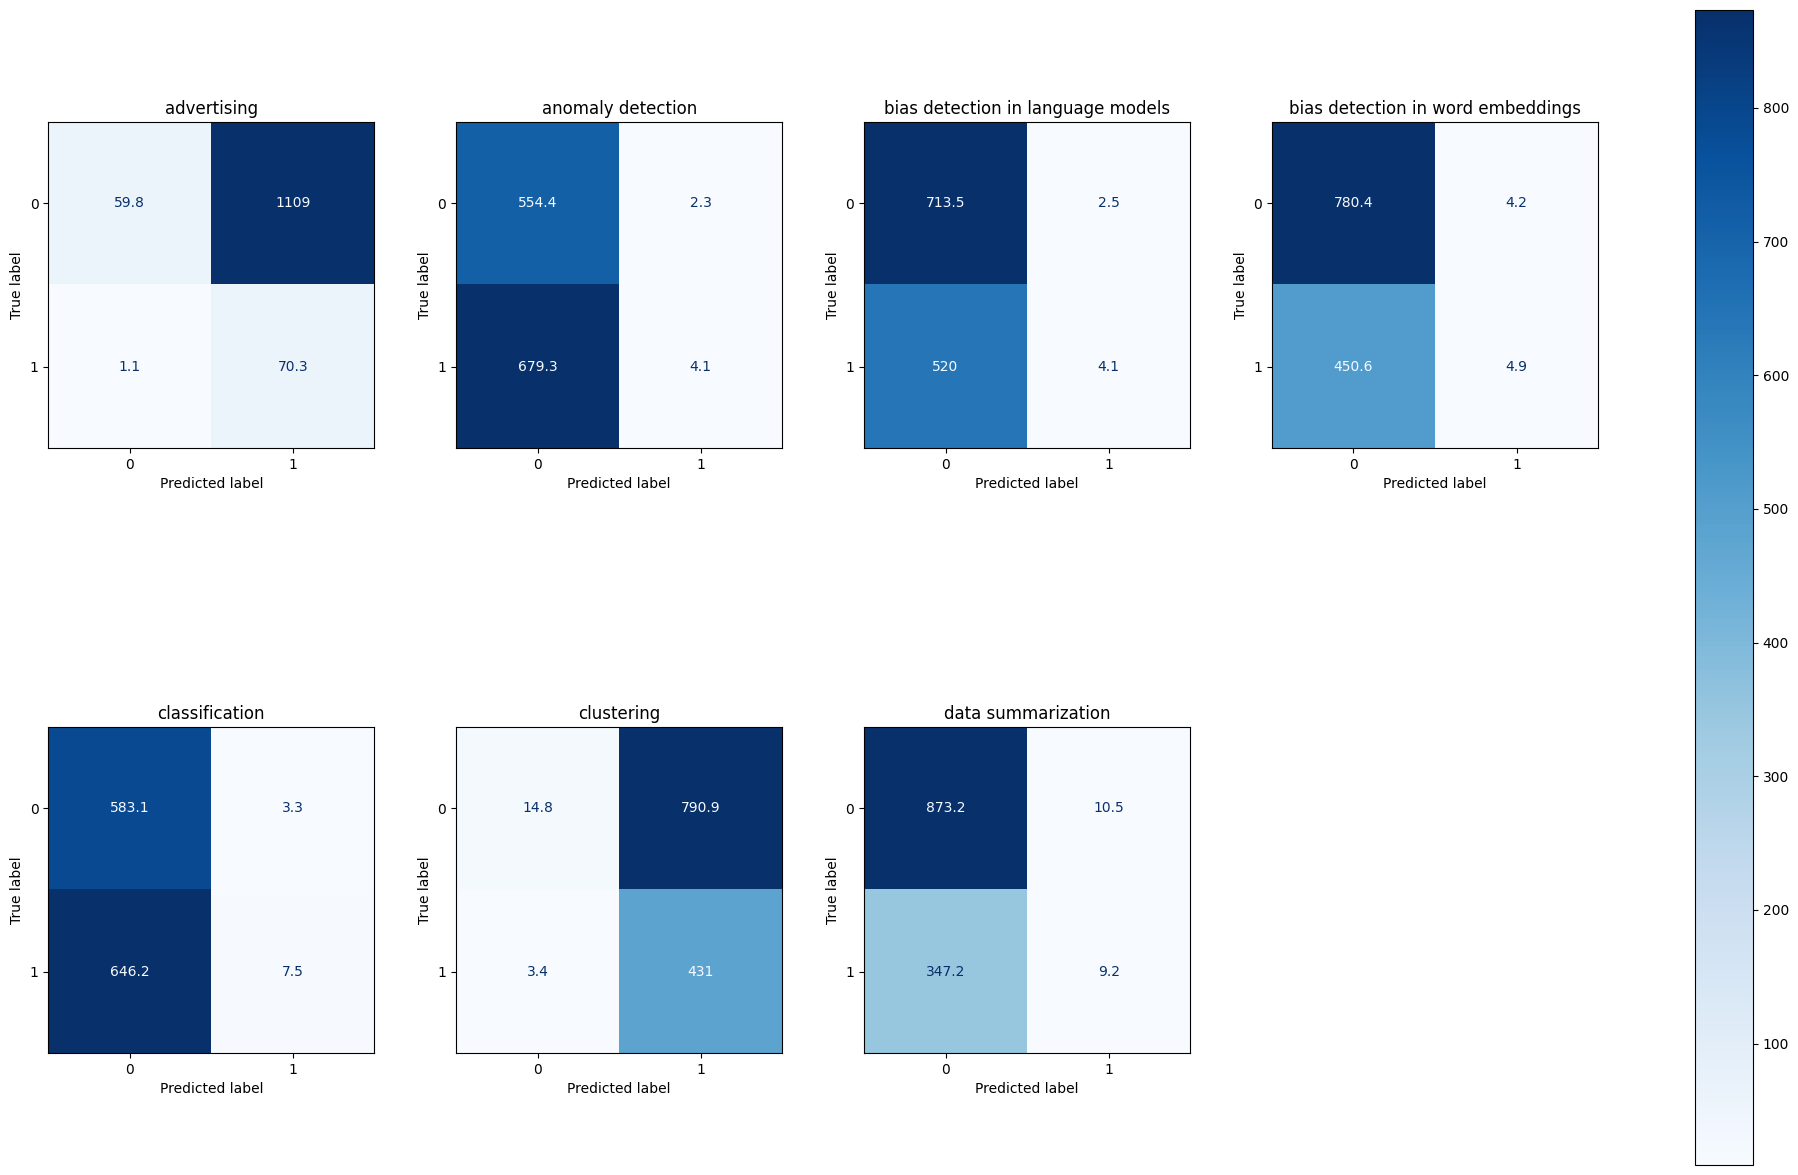

In [ ]:
model = GaussianNB()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, BinaryRelevance, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-21-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-21-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Precision: 0.6662745022104394
Recall Score: 0.5293486871050522
F1 Score: 0.5899103897100179
Hamming Loss: 0.18434059971247072


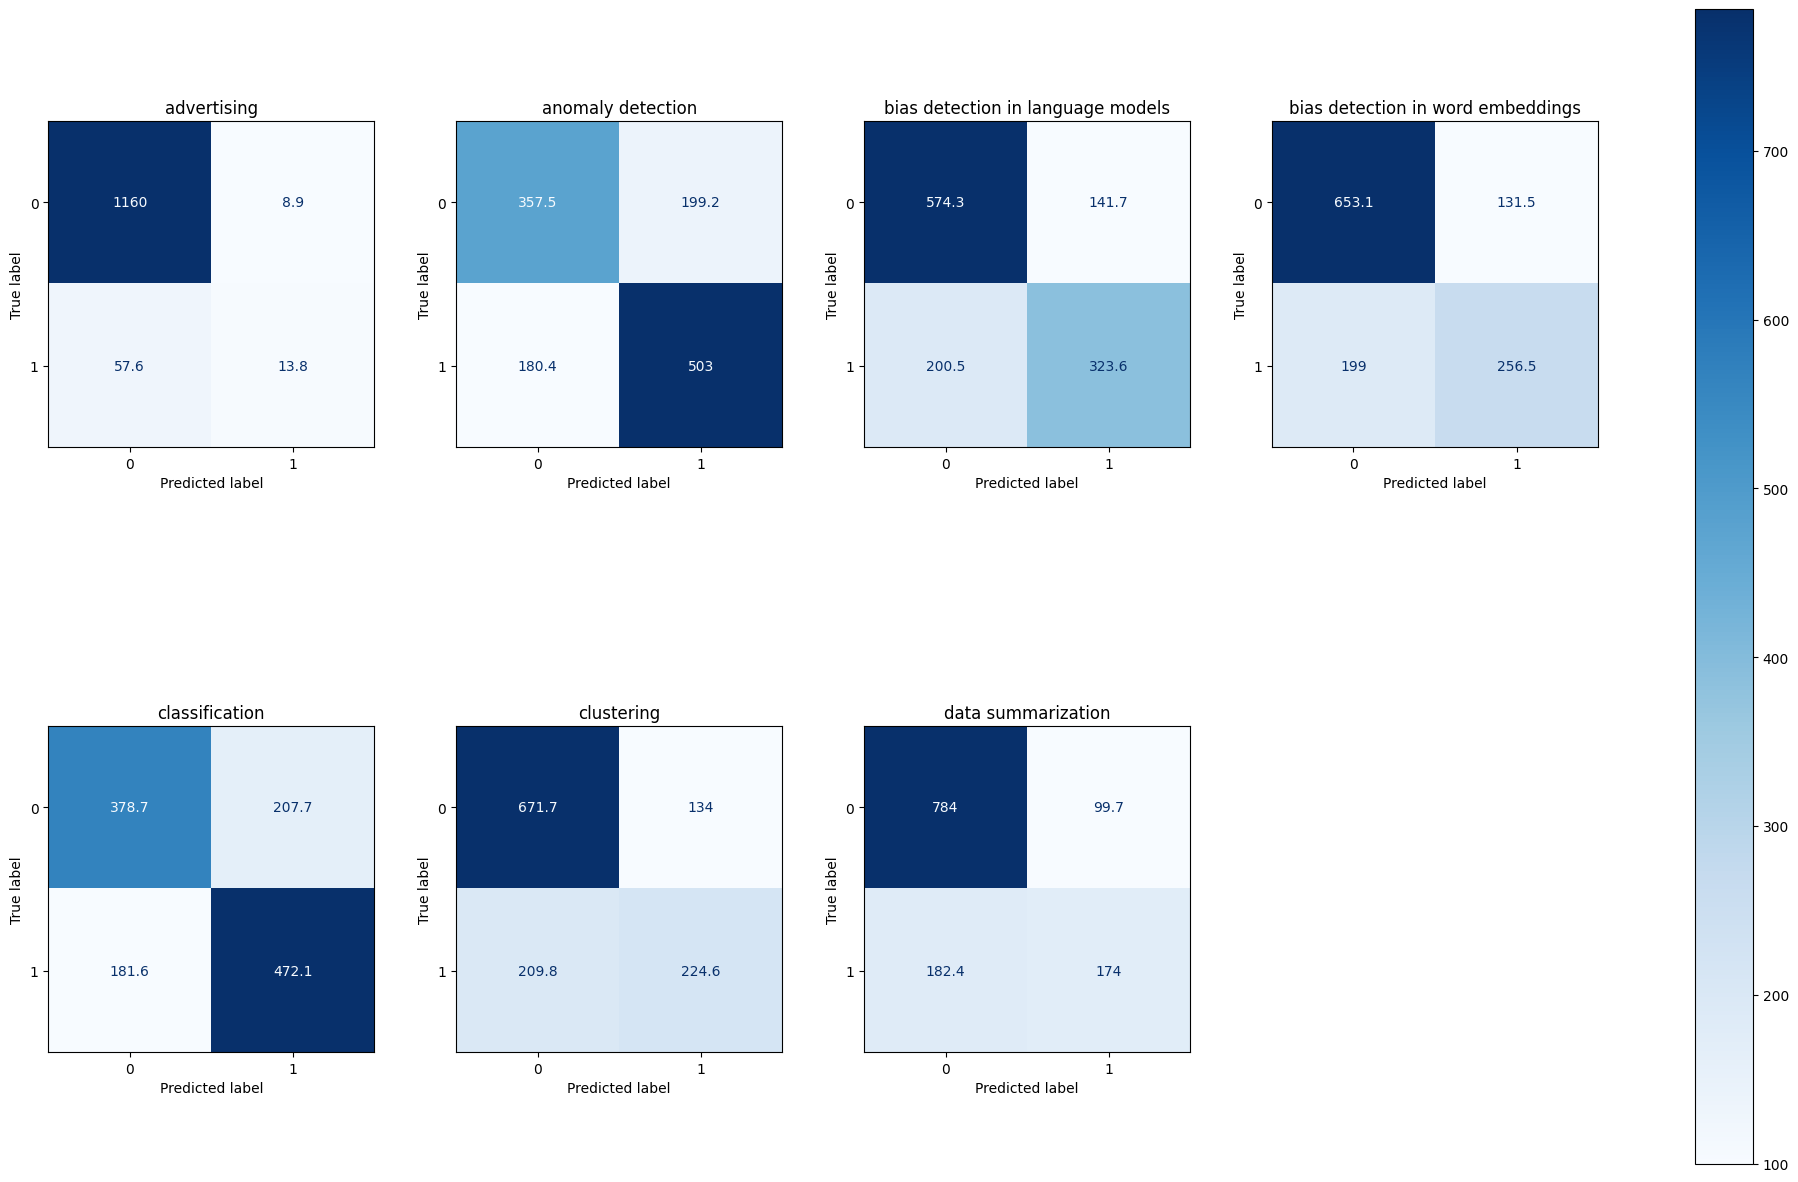

In [ ]:
model = KNeighborsClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, BinaryRelevance, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-21-690920ebd76b>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-21-690920ebd76b>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Precision: 0.8247480375805847
Recall Score: 0.8364557536093153
F1 Score: 0.8305396495316174
Hamming Loss: 0.08545497307662316


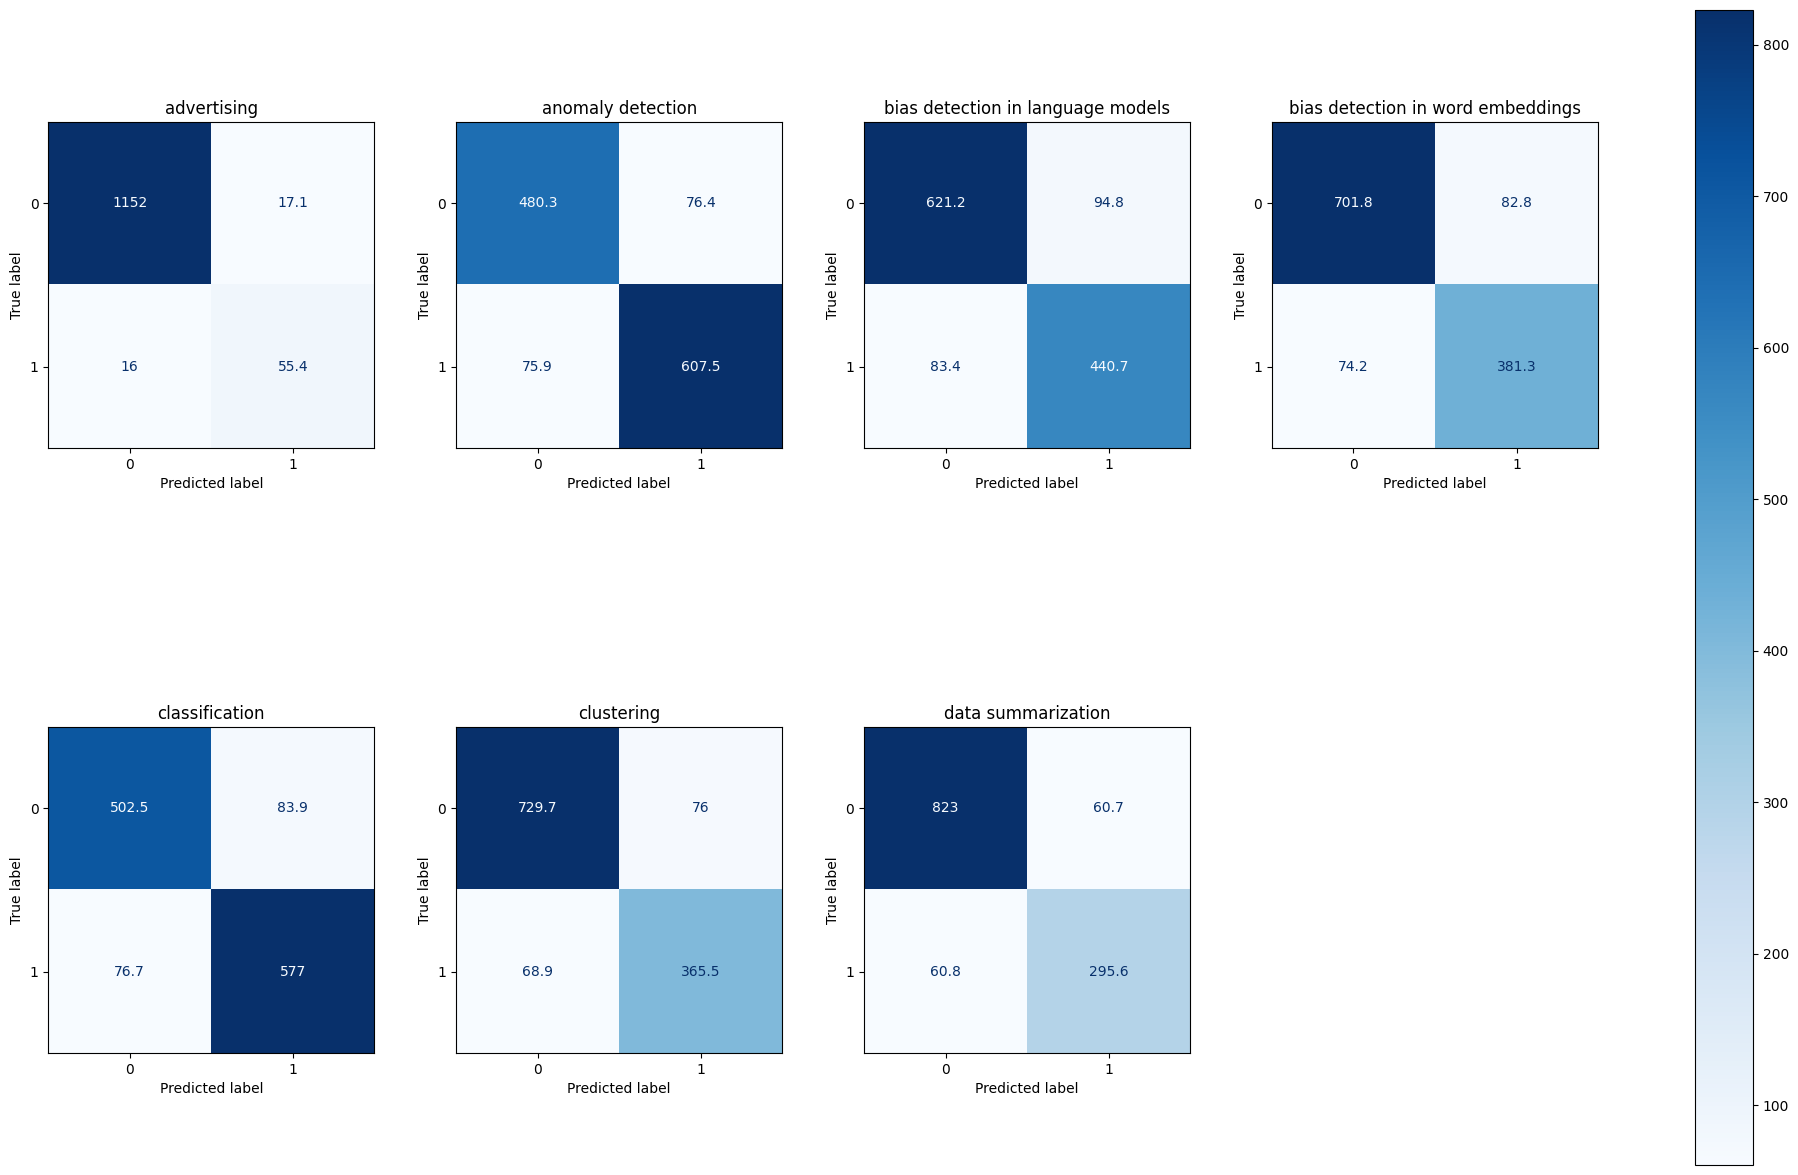

In [ ]:
model = DecisionTreeClassifier()

prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, BinaryRelevance, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

# LabelPowerset

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-17-ebc253be0416>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-17-ebc253be0416>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Precision: 0.9061207167998978
Recall Score: 0.816243007020595
F1 Score: 0.85878742412068
Hamming Loss: 0.06722466773173799


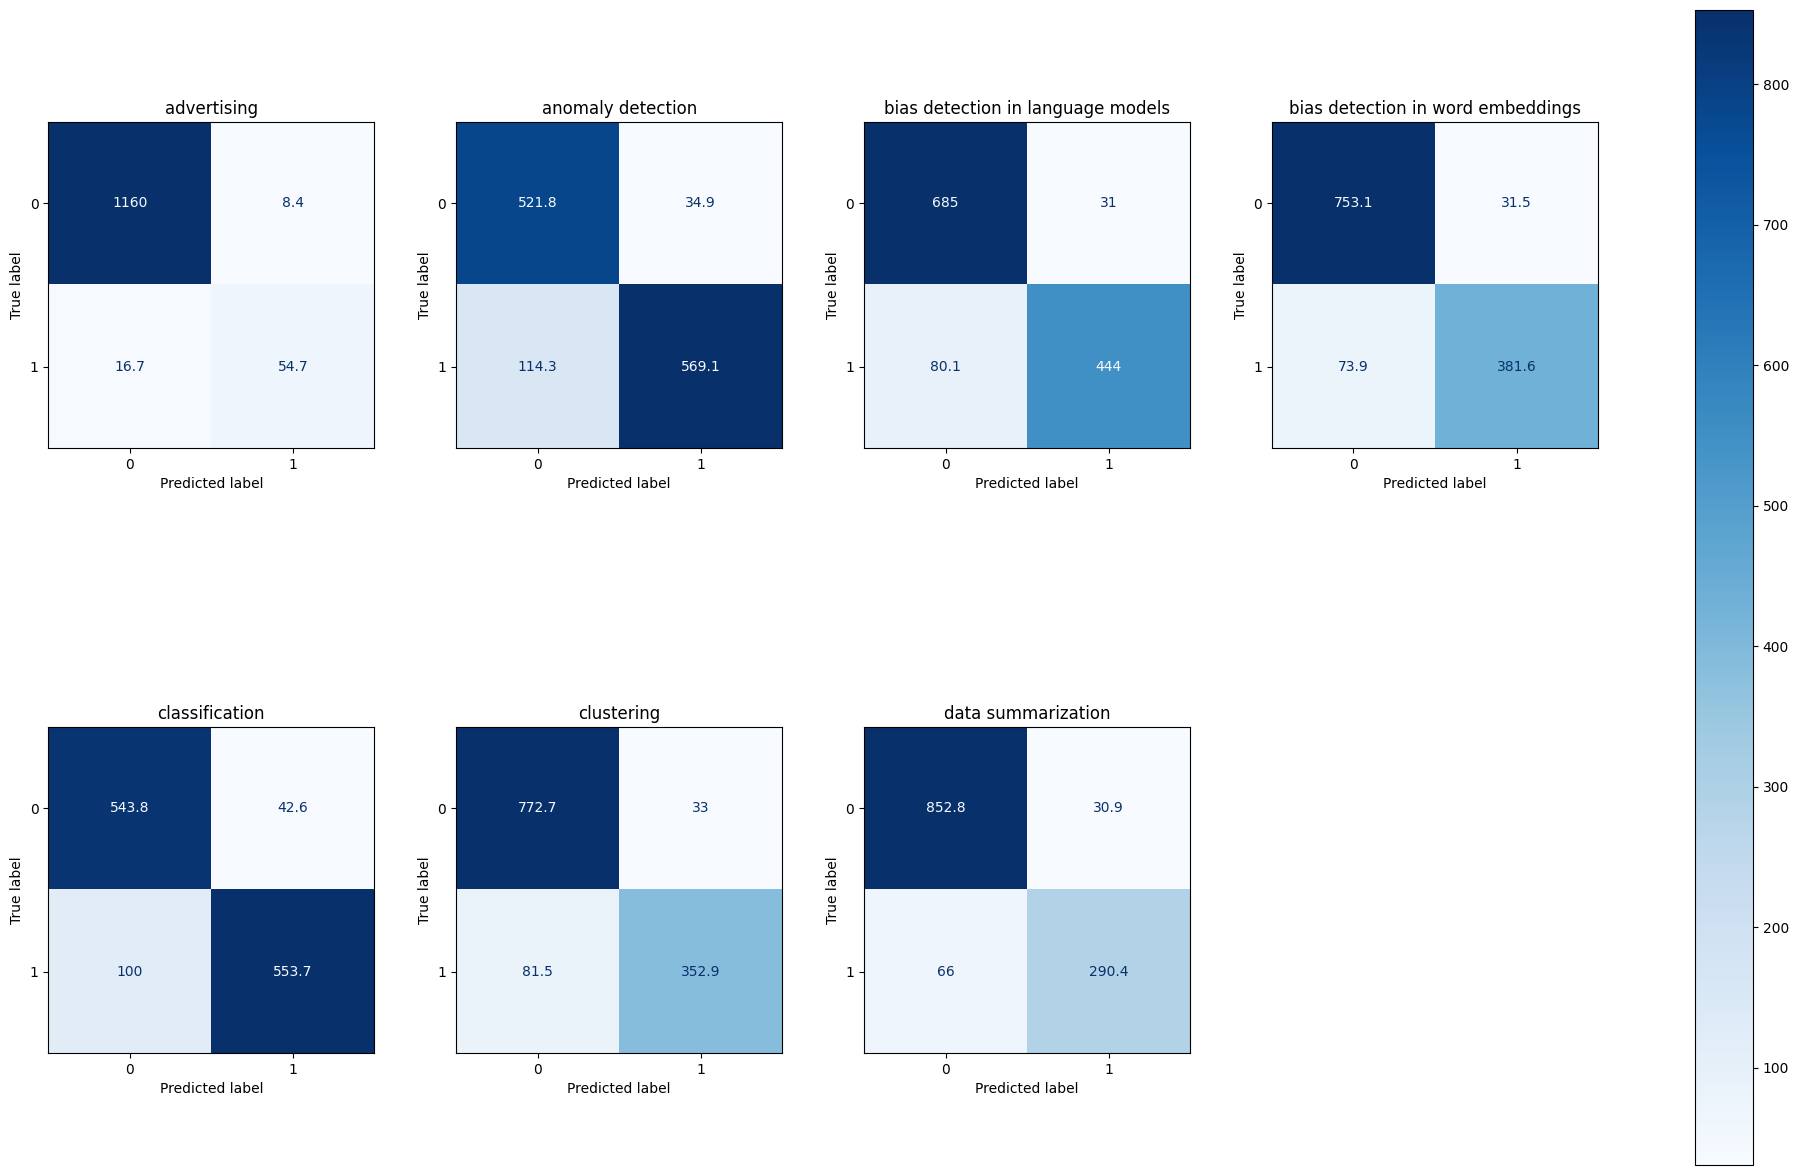

In [ ]:
model = RandomForestClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, LabelPowerset, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 2/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 3/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 4/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 5/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 6/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 7/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 8/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 9/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training on fold 10/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-17-ebc253be0416>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in

Precision: 0.5109705952689405
Recall Score: 0.45788468573987384
F1 Score: 0.48286091510552653
Hamming Loss: 0.2455533963644943


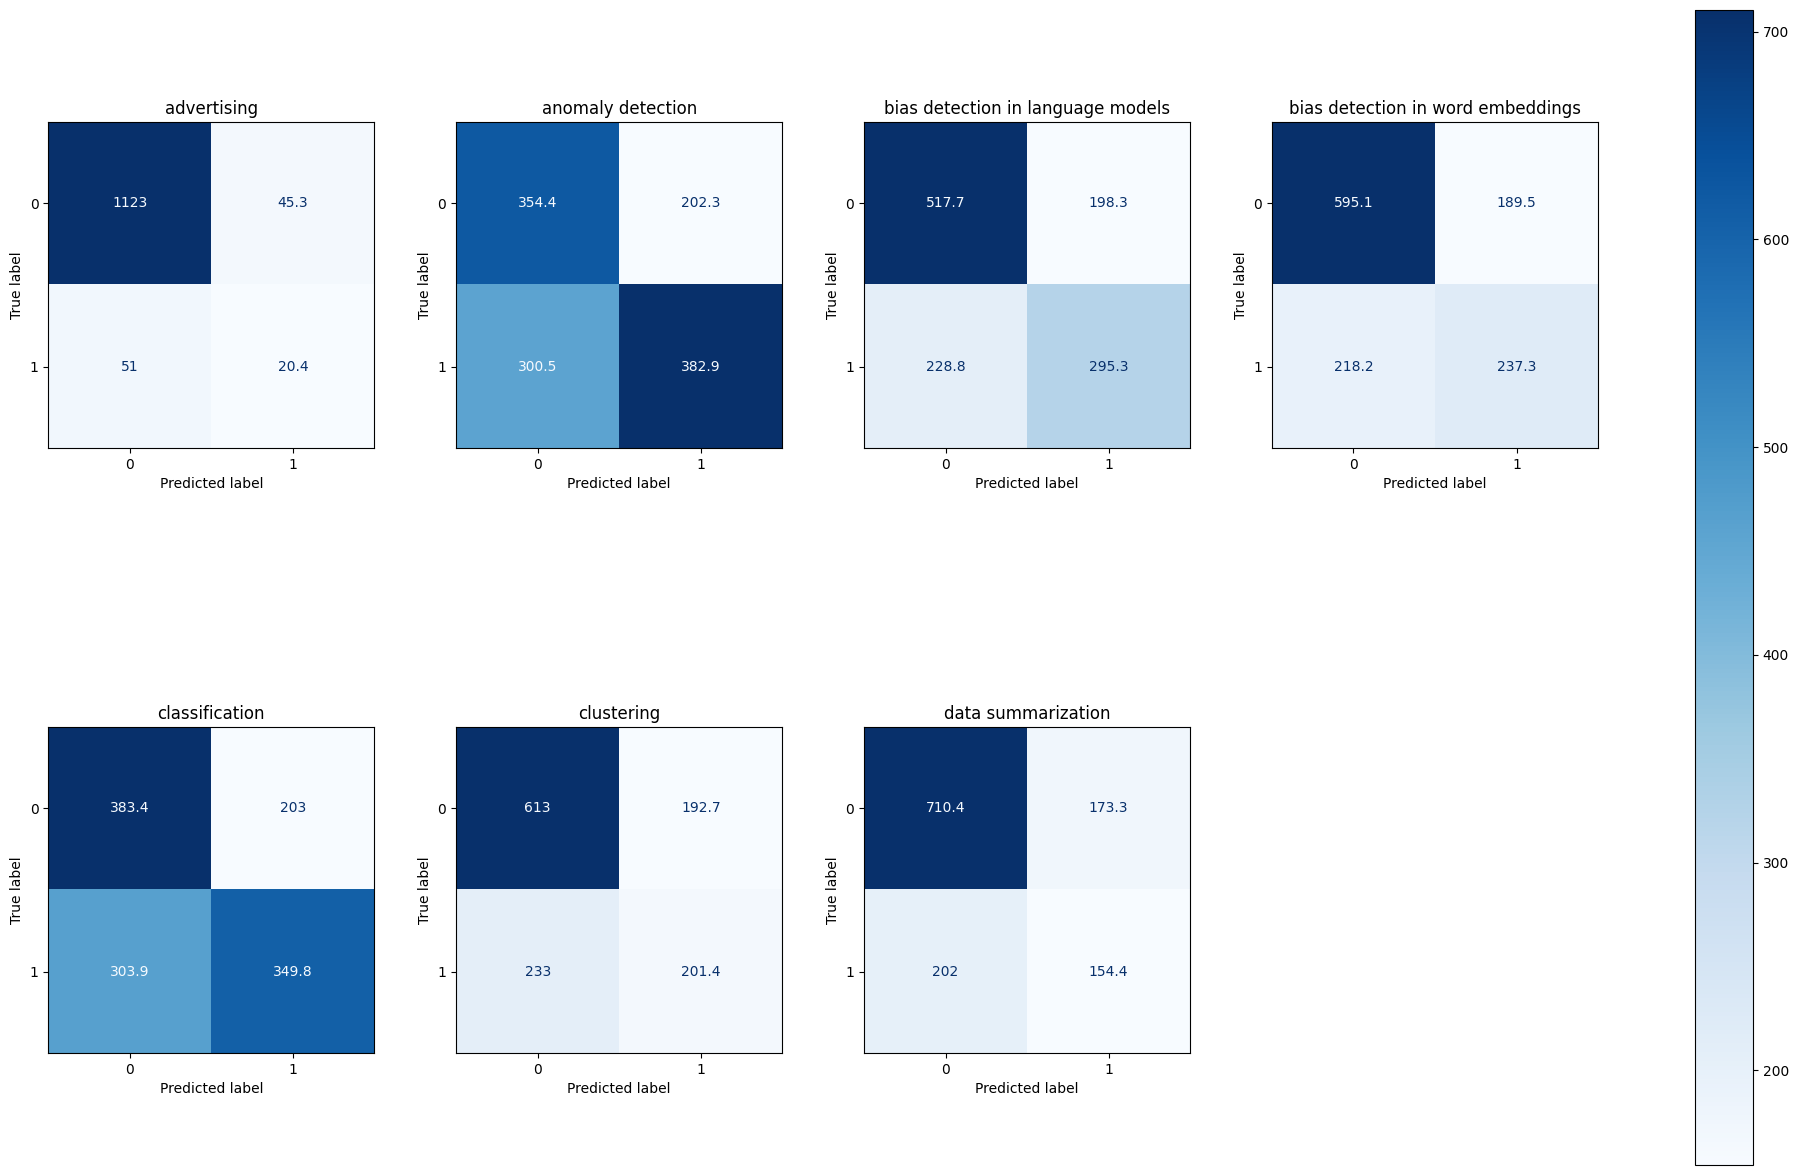

In [ ]:
model = LogisticRegression()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, LabelPowerset, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-17-ebc253be0416>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-17-ebc253be0416>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Precision: 0.36187101708603153
Recall Score: 0.47575104228369425
F1 Score: 0.4105930701847509
Hamming Loss: 0.34170388584408234


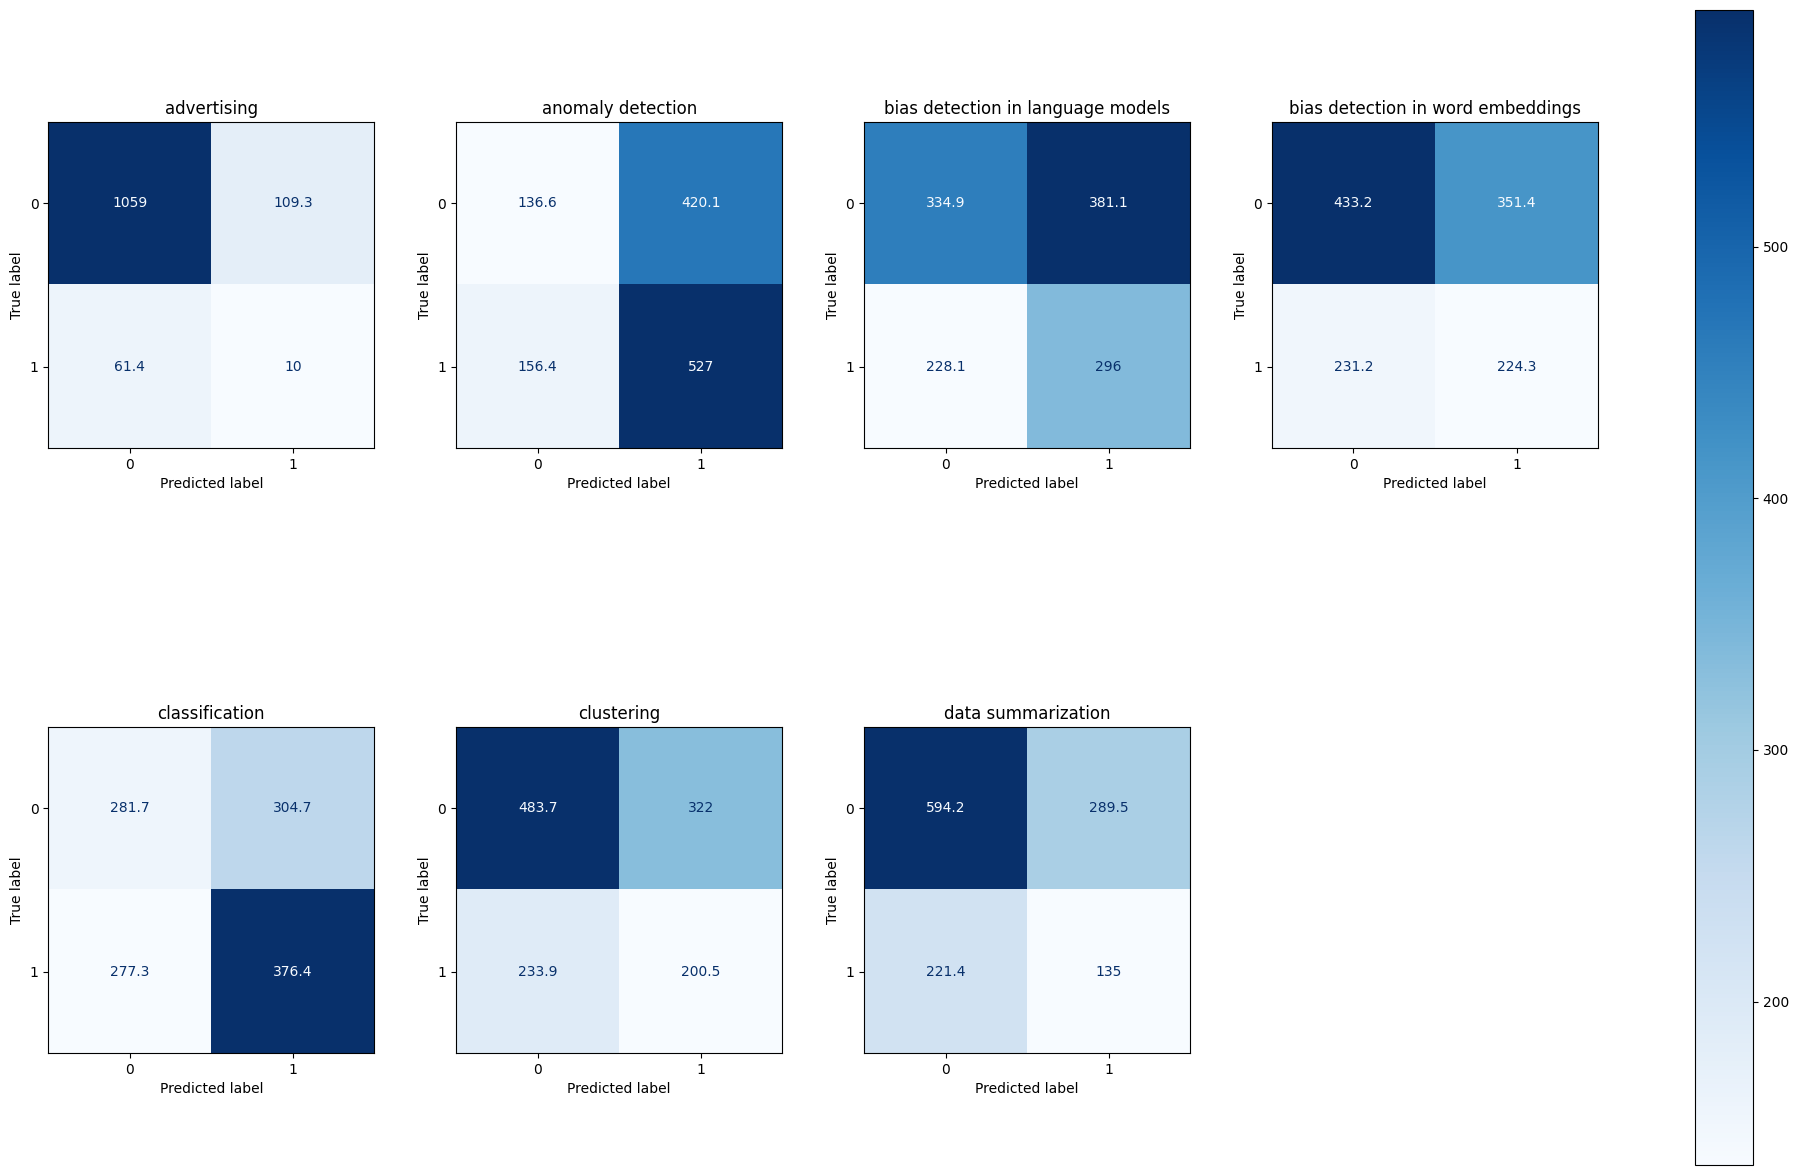

In [ ]:
model = GaussianNB()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, LabelPowerset, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-17-ebc253be0416>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-17-ebc253be0416>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Precision: 0.6238942672198248
Recall Score: 0.5067697075683042
F1 Score: 0.559071677680076
Hamming Loss: 0.20002720330798626


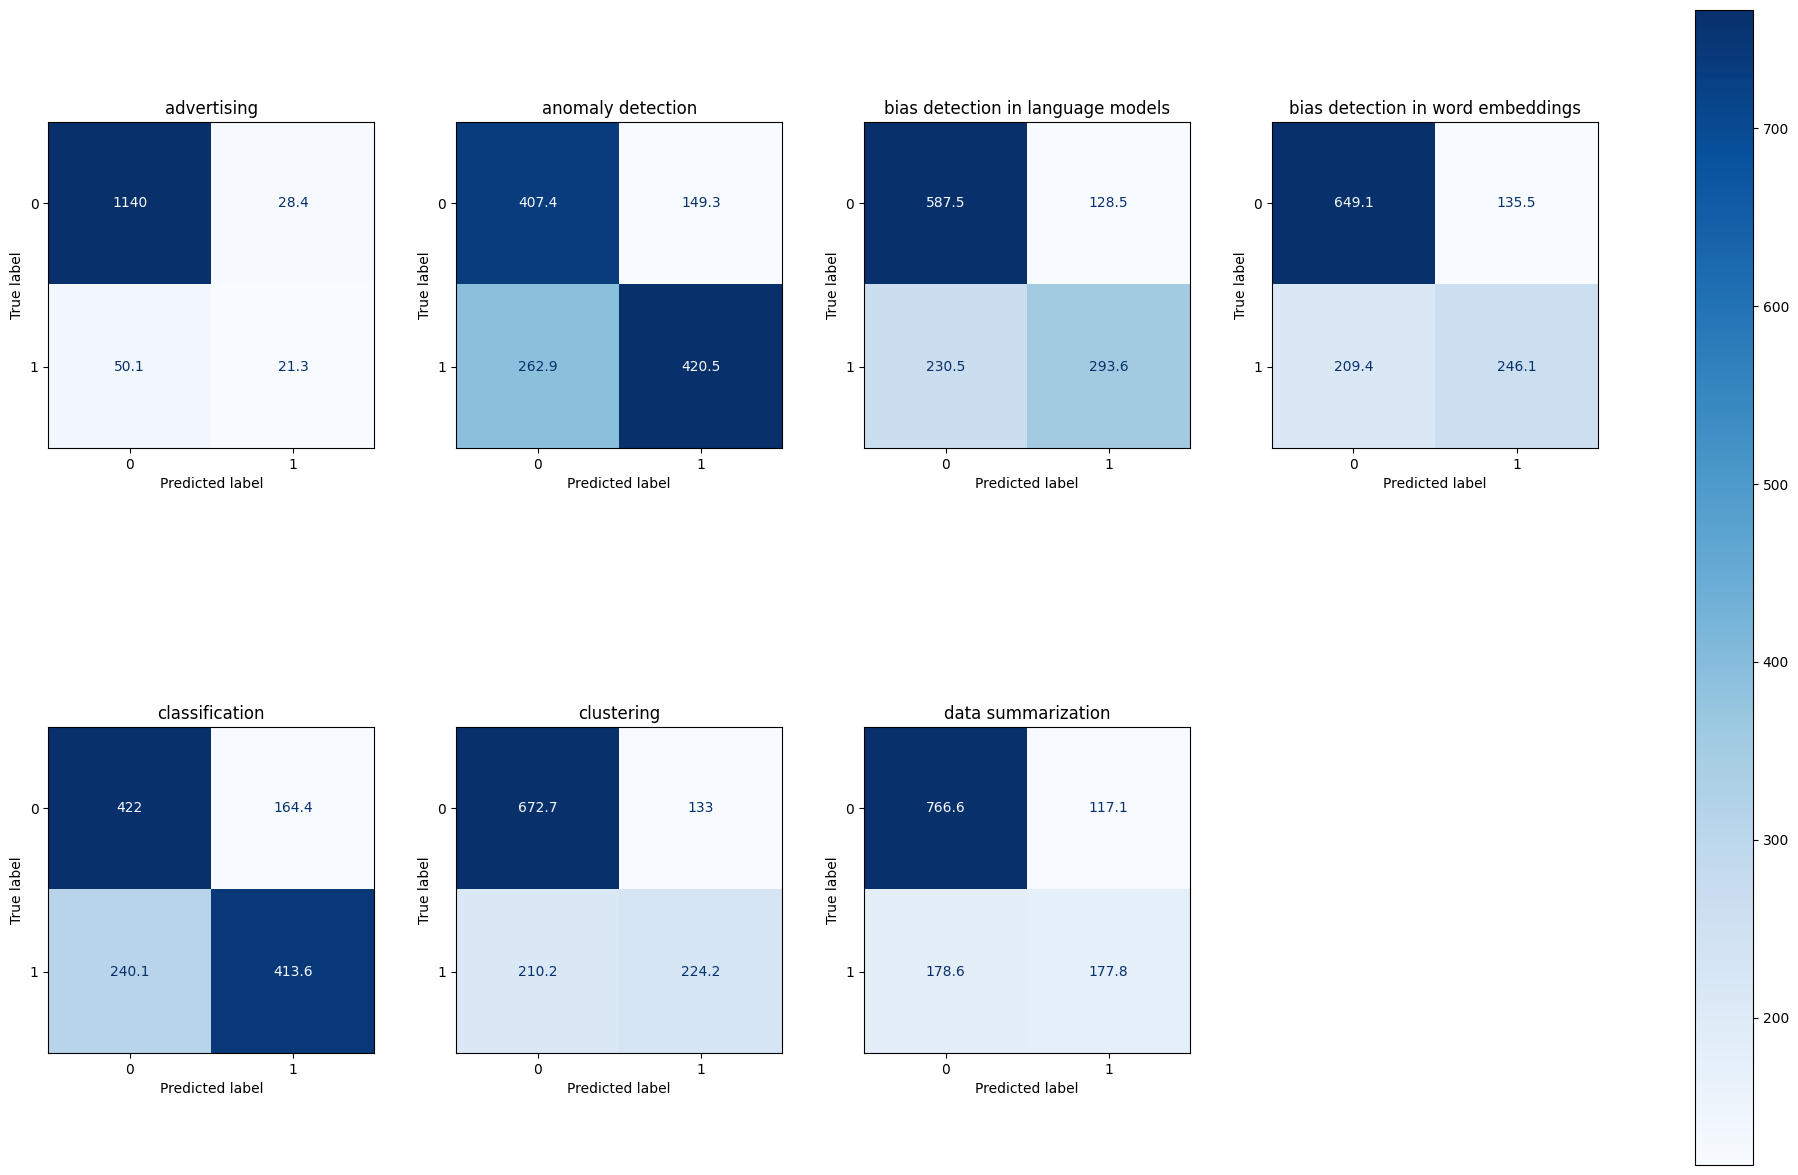

In [ ]:
model = KNeighborsClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, LabelPowerset, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-17-ebc253be0416>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-17-ebc253be0416>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Precision: 0.9046355668111156
Recall Score: 0.8947189595449135
F1 Score: 0.8996122776035559
Hamming Loss: 0.049940507135244734


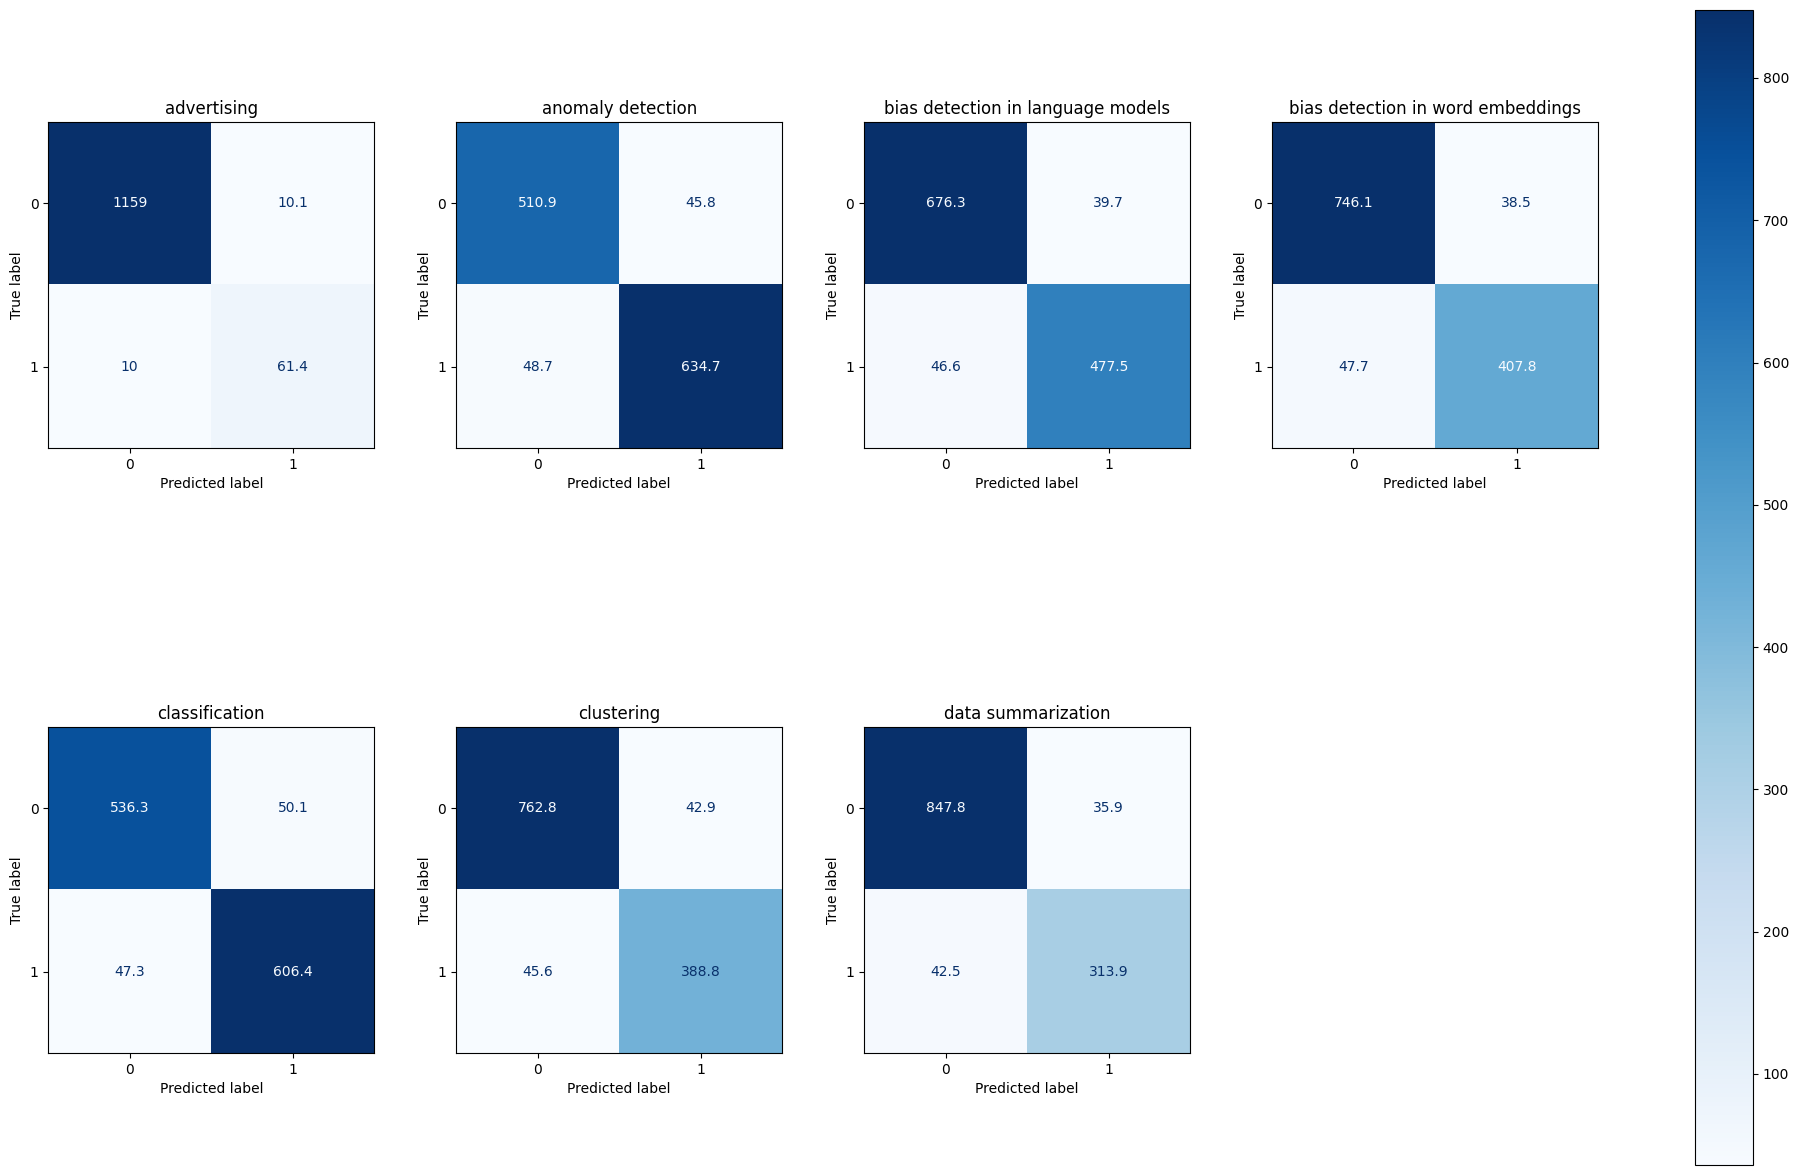

In [ ]:
model = DecisionTreeClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, LabelPowerset, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

# ClassifierChain

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-17-ebc253be0416>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-17-ebc253be0416>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Precision: 0.8487776902738607
Recall Score: 0.7603486554248926
F1 Score: 0.8020308585001956
Hamming Loss: 0.09395011827090535


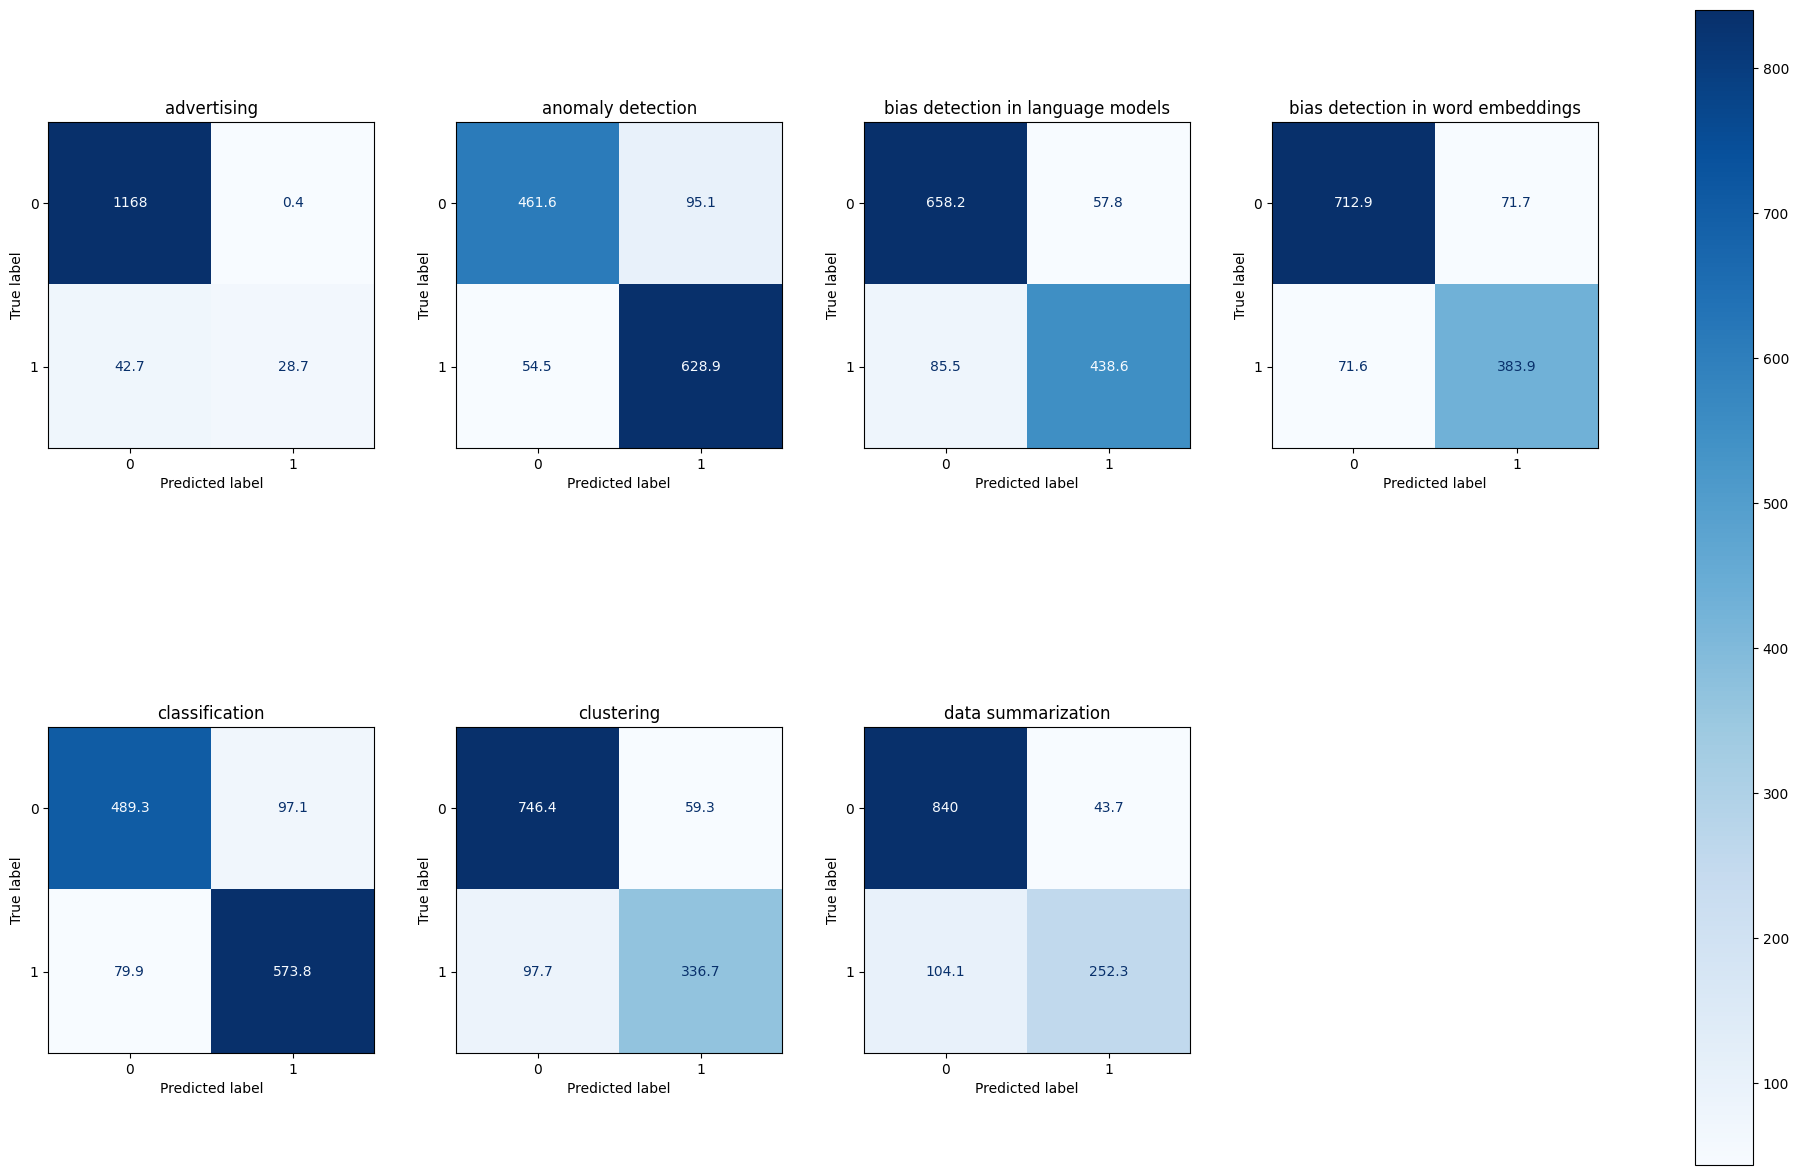

In [ ]:
model = RandomForestClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, ClassifierChain, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 2/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 3/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 4/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 5/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 6/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 7/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 8/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 9/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training on fold 10/10...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Precision: 0.5523711837934047
Recall Score: 0.23622059176131285
F1 Score: 0.33078342005252764
Hamming Loss: 0.23930135686621093


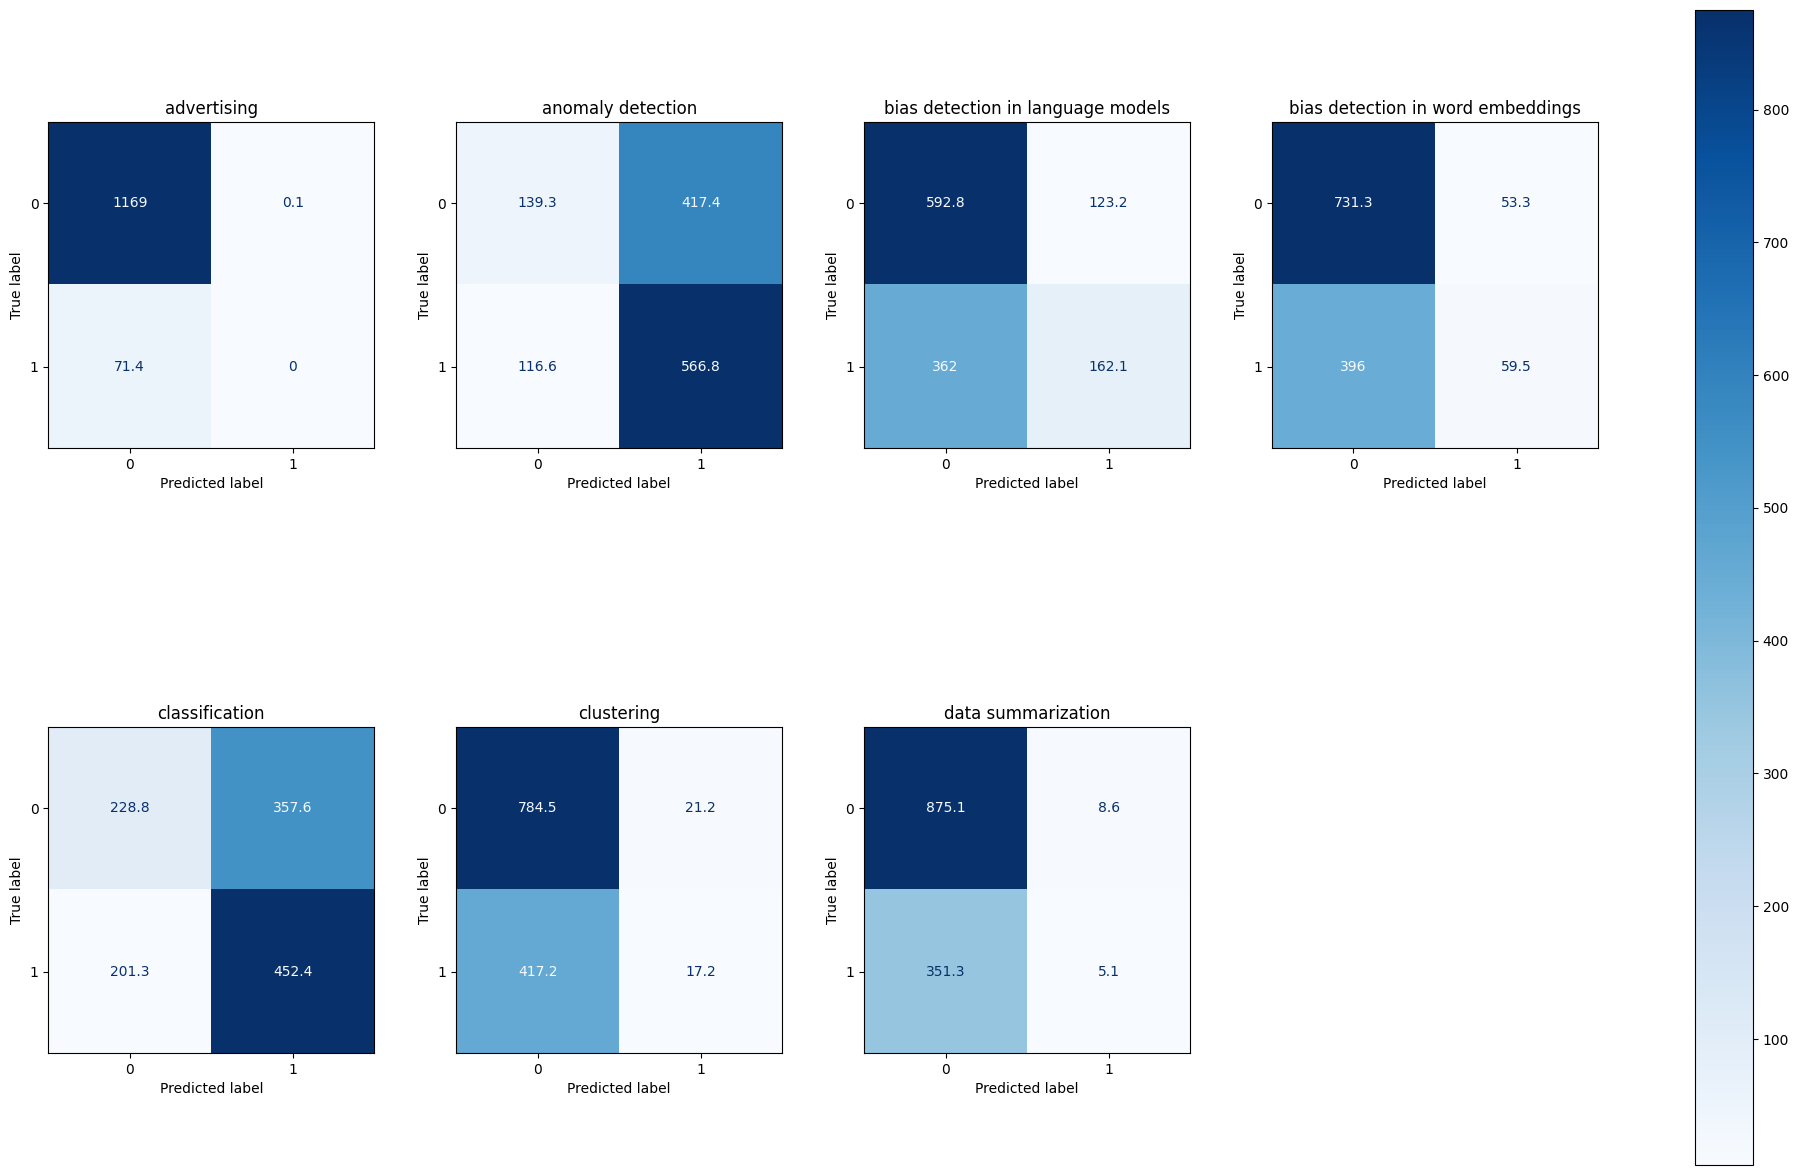

In [ ]:
model = LogisticRegression()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, ClassifierChain, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-17-ebc253be0416>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-17-ebc253be0416>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Precision: 0.14488500638799523
Recall Score: 0.2610284259714391
F1 Score: 0.1863256214634121
Hamming Loss: 0.5708880390423956


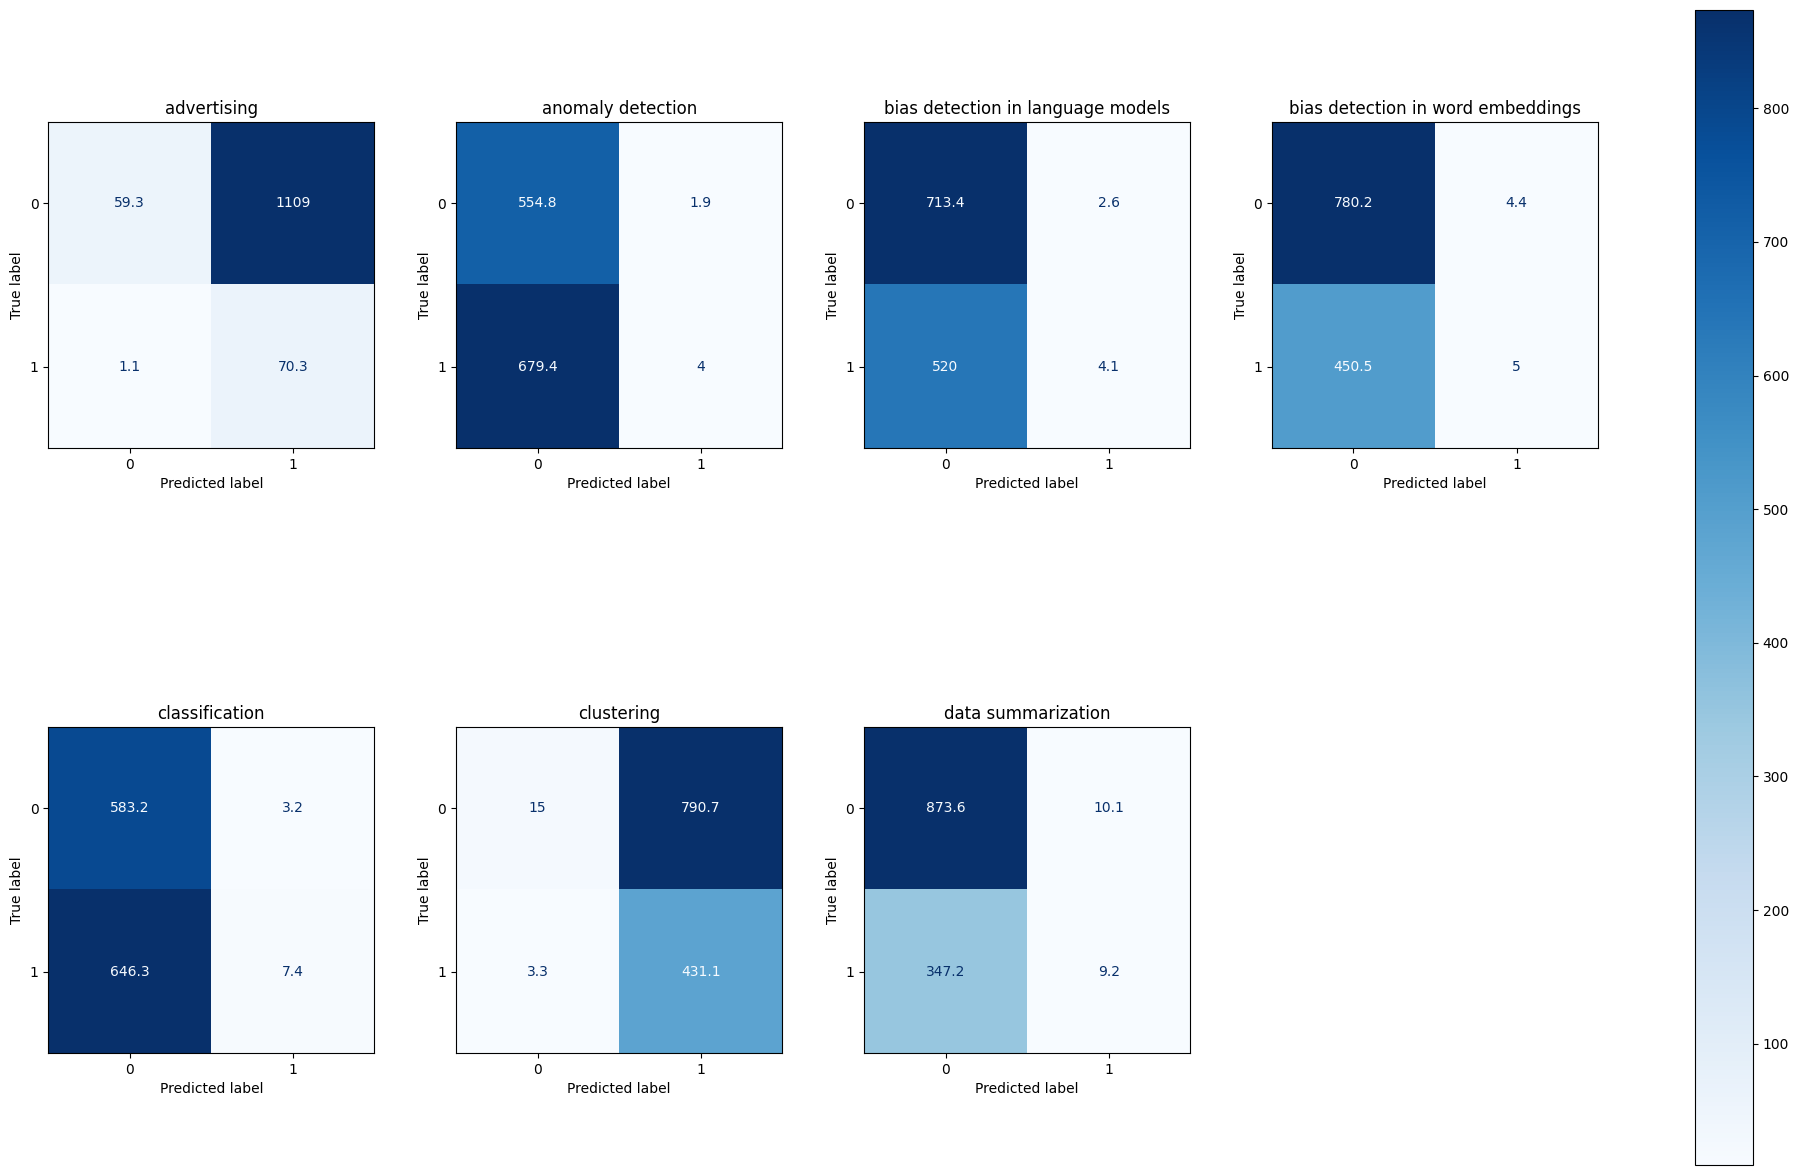

In [ ]:
model = GaussianNB()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, ClassifierChain, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-17-ebc253be0416>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-17-ebc253be0416>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Precision: 0.6639411738196392
Recall Score: 0.5262378079298239
F1 Score: 0.5870870959608293
Hamming Loss: 0.18534841429008464


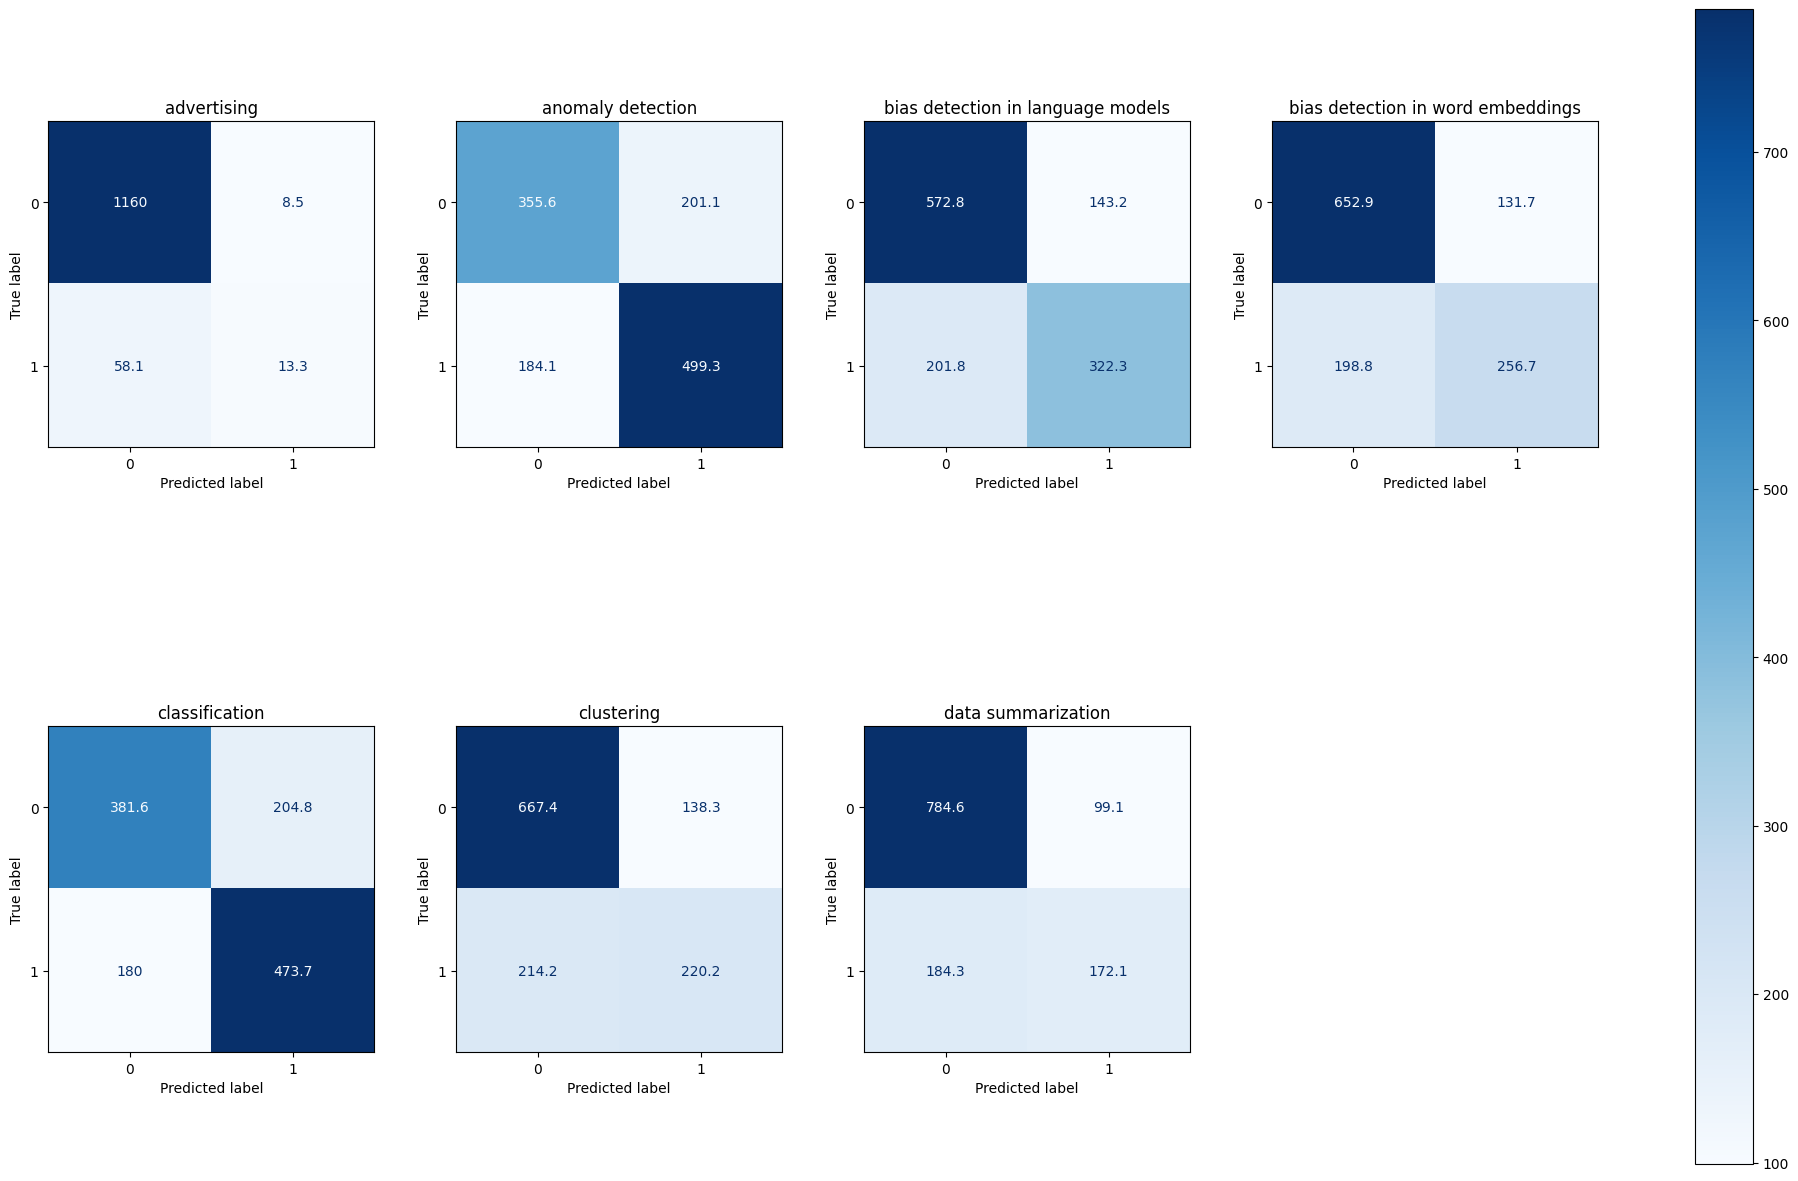

In [ ]:
model = KNeighborsClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, ClassifierChain, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...
Training on fold 2/10...
Training on fold 3/10...
Training on fold 4/10...
Training on fold 5/10...
Training on fold 6/10...
Training on fold 7/10...
Training on fold 8/10...
Training on fold 9/10...
Training on fold 10/10...


<ipython-input-17-ebc253be0416>:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  results.loc['F1-mean'][name] = np.mean(f_scores)
<ipython-input-17-ebc253be0416>:34: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0

Precision: 0.7898148202756716
Recall Score: 0.7906221278779759
F1 Score: 0.7901497730124489
Hamming Loss: 0.10520591184568598


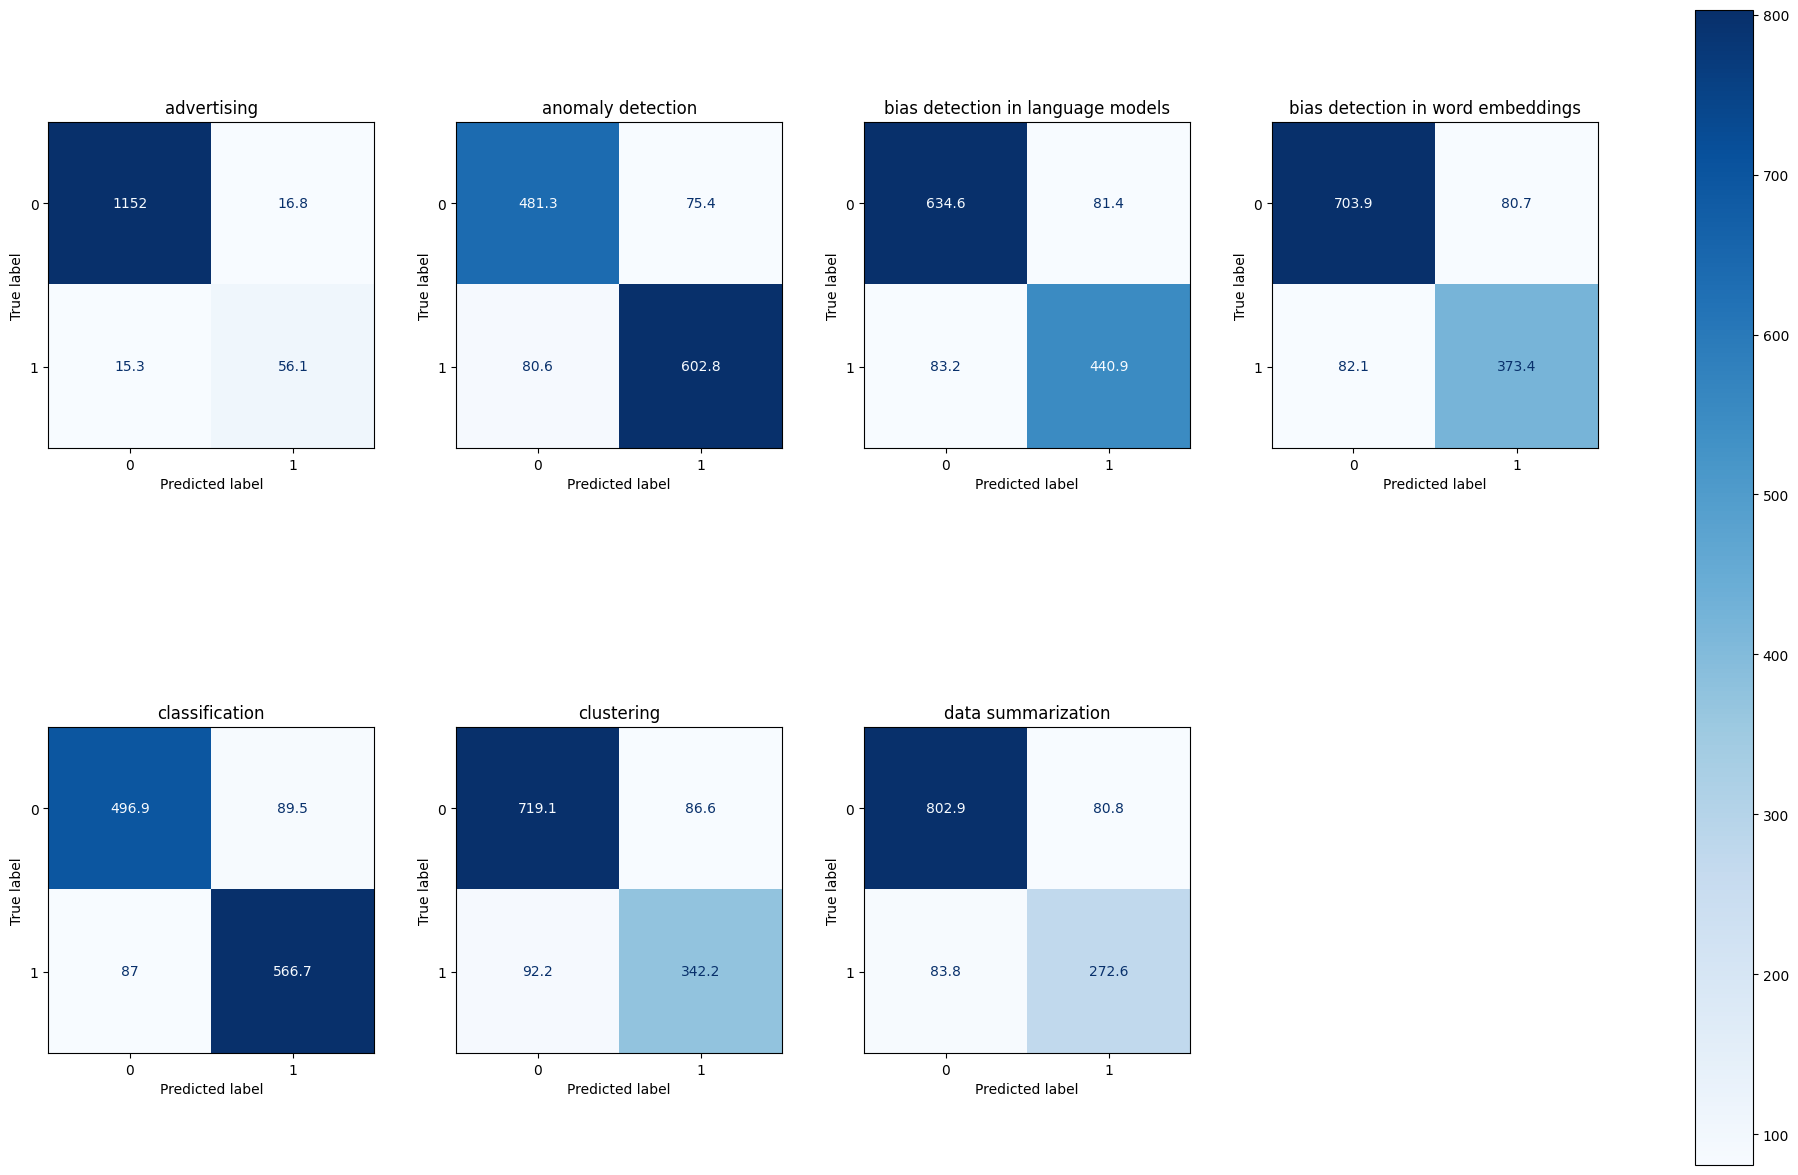

In [ ]:
model = DecisionTreeClassifier()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, ClassifierChain, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

In [ ]:
model = LinearSVC()
prec_score, rec_score, f_score, ham_loss, conf_matrix = build_model(model, ClassifierChain, X, y)

print('='*50)
print("Precision: " + str(np.mean(prec_score)))
print("Recall Score: " + str(np.mean(rec_score)))
print("F1 Score: " + str(np.mean(f_score)))
print("Hamming Loss: " + str(np.mean(ham_loss)))
plot_confusion_matrix(np.mean(conf_matrix, axis=0))

Training on fold 1/10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd

# Create directory if it doesn't exist
os.makedirs('./resultsMultilabel', exist_ok=True)

file_path = './resultsMultilabel/resultsMULTILABELS.xlsx'

# Check if the file exists; if not, create it in write mode
if not os.path.exists(file_path):
    with pd.ExcelWriter(file_path, mode='w') as writer:
        results.to_excel(writer, sheet_name='MultiLabelClf BERT')
else:
    # If file exists, append the data
    with pd.ExcelWriter(file_path, mode='a', if_sheet_exists='replace') as writer:
        results.to_excel(writer, sheet_name='MultiLabelClf BERT')

# Display the DataFrame
results.head()


,BinaryRelevance LogisticRegression,BinaryRelevance RandomForestClassifier,BinaryRelevance GaussianNB,BinaryRelevance LinearSVC,BinaryRelevance KNeighborsClassifier,BinaryRelevance DecisionTreeClassifier,ClassifierChain LogisticRegression,ClassifierChain RandomForestClassifier,ClassifierChain GaussianNB,ClassifierChain LinearSVC,ClassifierChain KNeighborsClassifier,ClassifierChain DecisionTreeClassifier,LabelPowerset LogisticRegression,LabelPowerset RandomForestClassifier,LabelPowerset GaussianNB,LabelPowerset LinearSVC,LabelPowerset KNeighborsClassifier,LabelPowerset DecisionTreeClassifier
F1-mean,NaN,NaN,NaN,NaN,NaN,NaN,0.330783,0.802031,0.186326,NaN,0.587087,0.79015,0.482861,0.858787,0.410593,NaN,0.559072,0.899612
Precision-mean,NaN,NaN,NaN,NaN,NaN,NaN,0.552371,0.848778,0.144885,NaN,0.663941,0.789815,0.510971,0.906121,0.361871,NaN,0.623894,0.904636
Recall-mean,NaN,NaN,NaN,NaN,NaN,NaN,0.236221,0.760349,0.261028,NaN,0.526238,0.790622,0.457885,0.816243,0.475751,NaN,0.50677,0.894719
Hammer-Loss-mean,NaN,NaN,NaN,NaN,NaN,NaN,0.239301,0.09395,0.570888,NaN,0.185348,0.105206,0.245553,0.067225,0.341704,NaN,0.200027,0.049941
F1-fold1,NaN,NaN,NaN,NaN,NaN,NaN,0.33724,0.795022,0.190214,NaN,0.58304,0.795949,0.469282,0.856451,0.403108,NaN,0.561368,0.909147


In [ ]:
user_story = "A group of researchers is using abstractive summarization to identify key trends and insights in large sets of biological data, enabling more efficient analysis and interpretation."
traindata = []
for msg in [user_story]:
    words = msg.split()
    vecs = []
    for word in words:
        if word in glove_vectors:
            vecs.append(glove_vectors[word])
    if vecs:
        vec_avg = sum(vecs) / len(vecs)
    else:
        vec_avg = [0] * 100
    traindata.append(vec_avg)
traindata = pd.DataFrame(traindata)
traindata.columns = traindata.columns.astype(str)
output = []
for prediction in multilabel.inverse_transform(clf.predict(traindata.values))[0]:
    output.append(prediction)
output

['anomaly detection',
 'clustering',
 'graph augmentation',
 'graph diffusion',
 'graph mining',
 'representation learning',
 'spatio-temporal process learning']

In [ ]:
# Serialize the multilabel trasformer.
with open('multilabel.pkl', 'wb') as f:
    pickle.dump(multilabel, f)

# Serialize the classifier
with open('LinearSVC_LabelPowerset.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [ ]:
def getTrainSetGlove():
    traindata = []
    for msg in dataset['User Story']:
        words = msg.split()
        vecs = []
        for word in words:
            if word in glove_vectors:
                vecs.append(glove_vectors[word])
        if vecs:
            vec_avg = sum(vecs) / len(vecs)
        else:
            vec_avg = [0] * 100
        traindata.append(vec_avg)
    traindata = pd.DataFrame(traindata)
    traindata.columns = traindata.columns.astype(str)
    return traindata

In [ ]:
X = getTrainSetGlove()
clf=LabelPowerset(LinearSVC())
clf.fit(X=X.values, y=y)


LabelPowerset(classifier=LinearSVC(), require_dense=[True, True])

# Albert

In [ ]:
from transformers import AlbertTokenizer
import pandas as pd

def getTrainSetALBERT():
    # Initialize the ALBERT tokenizer
    tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

    # Tokenize the dataset's 'User Story' column
    tokenized_data = tokenizer(dataset['User Story'].tolist(), padding=True, truncation=True, max_length=100)

    # Convert input IDs to a DataFrame
    traindata = []
    for msg in tokenized_data['input_ids']:
        traindata.append(msg)
    traindata = pd.DataFrame(traindata)
    traindata.columns = traindata.columns.astype(str)

    return traindata


In [ ]:
X = getTrainSetALBERT()
clf=LabelPowerset(LinearSVC())
clf.fit(X=X.values, y=y)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
